# Recursively create better images

In [13]:
prompt_dev = """

You are an AI assistant that generates Python scripts using Matplotlib to create diagrams illustrating science concepts.

Your task is as follows:

- **Analyze** the text and identify key concepts that can be visually represented.
- **Plan** step-by-step what to include in the diagram, and write this plan in pseudocode with great detail.
- **Output** the complete Python code in a single code block, including necessary imports.
    - **Save** the plot; filepath should be combination of 'folder' and 'filename' which MUST be constructed and inserted as f string. (eg. ```plt.savefig(<insert-f-string>, format='jpg', dpi=300, bbox_inches='tight')```)
- **Minimize** any other prose.
- **Format** your answer using Markdown, and include the programming language name at the start of the code block (e.g., `python`).

Do not include any additional explanations or text. Your code should be complete and runnable as-is to generate the diagram.


**REDO TASK**
You may have already performed this task in the previous prompt. If so, thoroughly review your previous work and the subsequent feedback before proceeding.

For redo tasks, you should aim to improve your performance based on the feedback provided. Specifically, focus on the following:

- **Accuracy**: Ensure the diagram accurately represents the scientific concept.
- **Clarity**: Make the diagram as clear and easy to understand as possible. Consider labels, colors, and other visual elements.
 
Follow the output instructions from above and make sure to address any issues previously identified in your work.

"""

In [14]:
prompt_qa = """

You are an AI assistant that critiques Matplotlib diagrams.

Your task is as follows:

1. **Analyze** the diagram provided.
2. **Identify** flaws in the diagram. Flaws can be both:
    - **Visual**: Issues with clarity, labeling, or aesthetics.
    - **Conceptual**: Errors in the representation of the underlying concepts.
3.a. **If the diagram is correct** and has no flaws, state that it is correct.
3.b. **If the diagram is incorrect** or can be improved, provide clear instructions for improving the diagram. These instructions should be detailed and actionable.: 

"""

In [15]:
concept = """**Lift**: This is the force that allows planes to rise off the ground. It's generated 
by the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, 
it creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so 
that air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, 
the faster air on top creates a lower pressure compared to the higher pressure underneath. This 
pressure difference creates lift, allowing the plane to ascend."""

In [16]:
history = []

In [17]:
message = {
    "role": "assistant",
    "content": concept
}

history.append(message)

messages = [{"role": "system", "content": prompt_dev}] + history

In [18]:
from openai import OpenAI

client = OpenAI()

In [19]:
messages

[{'role': 'system',
  'content': "\n\nYou are an AI assistant that generates Python scripts using Matplotlib to create diagrams illustrating science concepts.\n\nYour task is as follows:\n\n- **Analyze** the text and identify key concepts that can be visually represented.\n- **Plan** step-by-step what to include in the diagram, and write this plan in pseudocode with great detail.\n- **Output** the complete Python code in a single code block, including necessary imports.\n    - **Save** the plot; filepath should be combination of 'folder' and 'filename' which MUST be constructed and inserted as f string. (eg. ```plt.savefig(<insert-f-string>, format='jpg', dpi=300, bbox_inches='tight')```)\n- **Minimize** any other prose.\n- **Format** your answer using Markdown, and include the programming language name at the start of the code block (e.g., `python`).\n\nDo not include any additional explanations or text. Your code should be complete and runnable as-is to generate the diagram.\n\n\n**R

In [20]:
response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    stop=None,
    temperature=0.7,
    messages=messages,
)

In [21]:
print(response.choices[0].message.content)

```python
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Define the airfoil shape
x = np.linspace(0, 1, 100)
y_upper = 0.1 * np.sin(np.pi * x) + 0.1  # Upper surface of the airfoil
y_lower = -0.1 * np.sin(np.pi * x)       # Lower surface of the airfoil

# Step 3: Plot the airfoil
ax.fill_between(x, y_upper, y_lower, color='lightgray', label='Airfoil Shape')

# Step 4: Create airflow lines
for i in np.arange(0, 1.1, 0.2):
    ax.plot([0, 1], [0.2 + i*0.1, 0.2 + i*0.1], color='blue', linestyle='--', alpha=0.5)
    ax.plot([0, 1], [-0.2 - i*0.1, -0.2 - i*0.1], color='blue', linestyle='--', alpha=0.5)

# Step 5: Add arrows to represent airflow direction
ax.arrow(0.5, 0.3, 0.4, 0, head_width=0.02, head_length=0.05, fc='black', ec='black')
ax.arrow(0.5, -0.3, 0.4, 0, head_width=0.02, head_length=0.05, fc='black', ec='black')

# Step 6: Add labels
ax.text(0.5, 0.35, 'Faster Airflow', fontsize=12, ha='ce

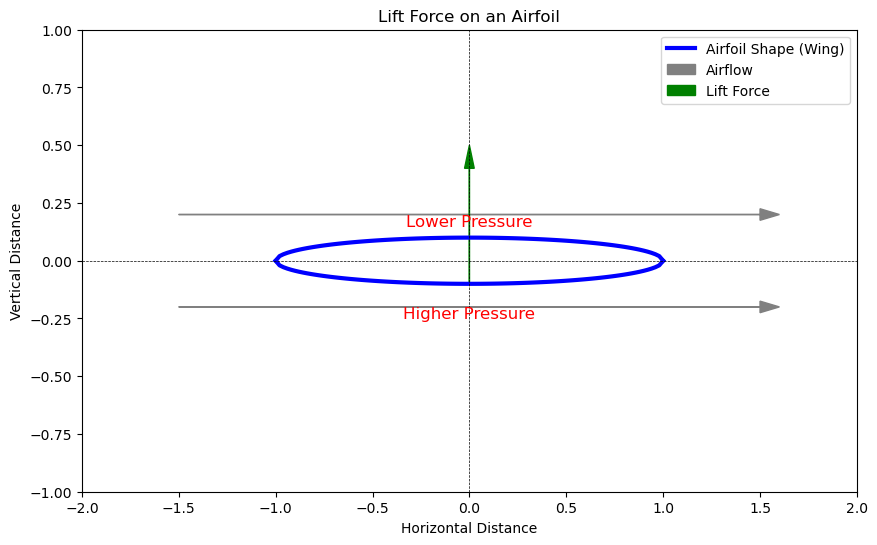

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Define airfoil shape (wing shape)
x = np.linspace(-1, 1, 100)
y_top = 0.1 * np.sqrt(1 - (x**2))  # Top curve of the airfoil
y_bottom = -0.1 * np.sqrt(1 - (x**2))  # Bottom curve of the airfoil

# Step 3: Draw the airfoil
ax.plot(x, y_top, color='blue', label='Airfoil Shape (Wing)', linewidth=3)
ax.plot(x, y_bottom, color='blue', linewidth=3)

# Step 4: Add airflow arrows above and below the wing
ax.arrow(-1.5, 0.2, 3, 0, head_width=0.05, head_length=0.1, fc='gray', ec='gray', label='Airflow')
ax.arrow(-1.5, -0.2, 3, 0, head_width=0.05, head_length=0.1, fc='gray', ec='gray')

# Step 5: Indicate pressure difference
ax.text(0, 0.15, 'Lower Pressure', fontsize=12, color='red', ha='center')
ax.text(0, -0.25, 'Higher Pressure', fontsize=12, color='red', ha='center')

# Step 6: Add lift force arrow
ax.arrow(0, -0.1, 0, 0.5, head_width=0.05, head_length=0.1, fc='green', ec='green', label='Lift Force')

# Step 7: Set limits and labels
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 1)
ax.set_title('Lift Force on an Airfoil')
ax.set_xlabel('Horizontal Distance')
ax.set_ylabel('Vertical Distance')
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.axvline(0, color='black', linewidth=0.5, linestyle='--')

# Step 8: Add legend
ax.legend()

# Step 9: Save the plot
plt.savefig('output/diagram.png', format='png', dpi=300, bbox_inches='tight')

# Step 10: Show the plot
plt.show()

In [28]:
import json


message = response.choices[0].message

history.append(
    json.loads(message.model_dump_json())
)

In [29]:
history

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee

In [30]:
import base64


def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [31]:
# Path to your image
image_path = 'diagrams_v3/how_lift_is_generated_by_airfoil.jpg'

# Getting the base64 string
base64_image = encode_image(image_path)

In [44]:
message = {
    "role": "user",
    "content": [
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        }
    ],
}

history.append(message)

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee
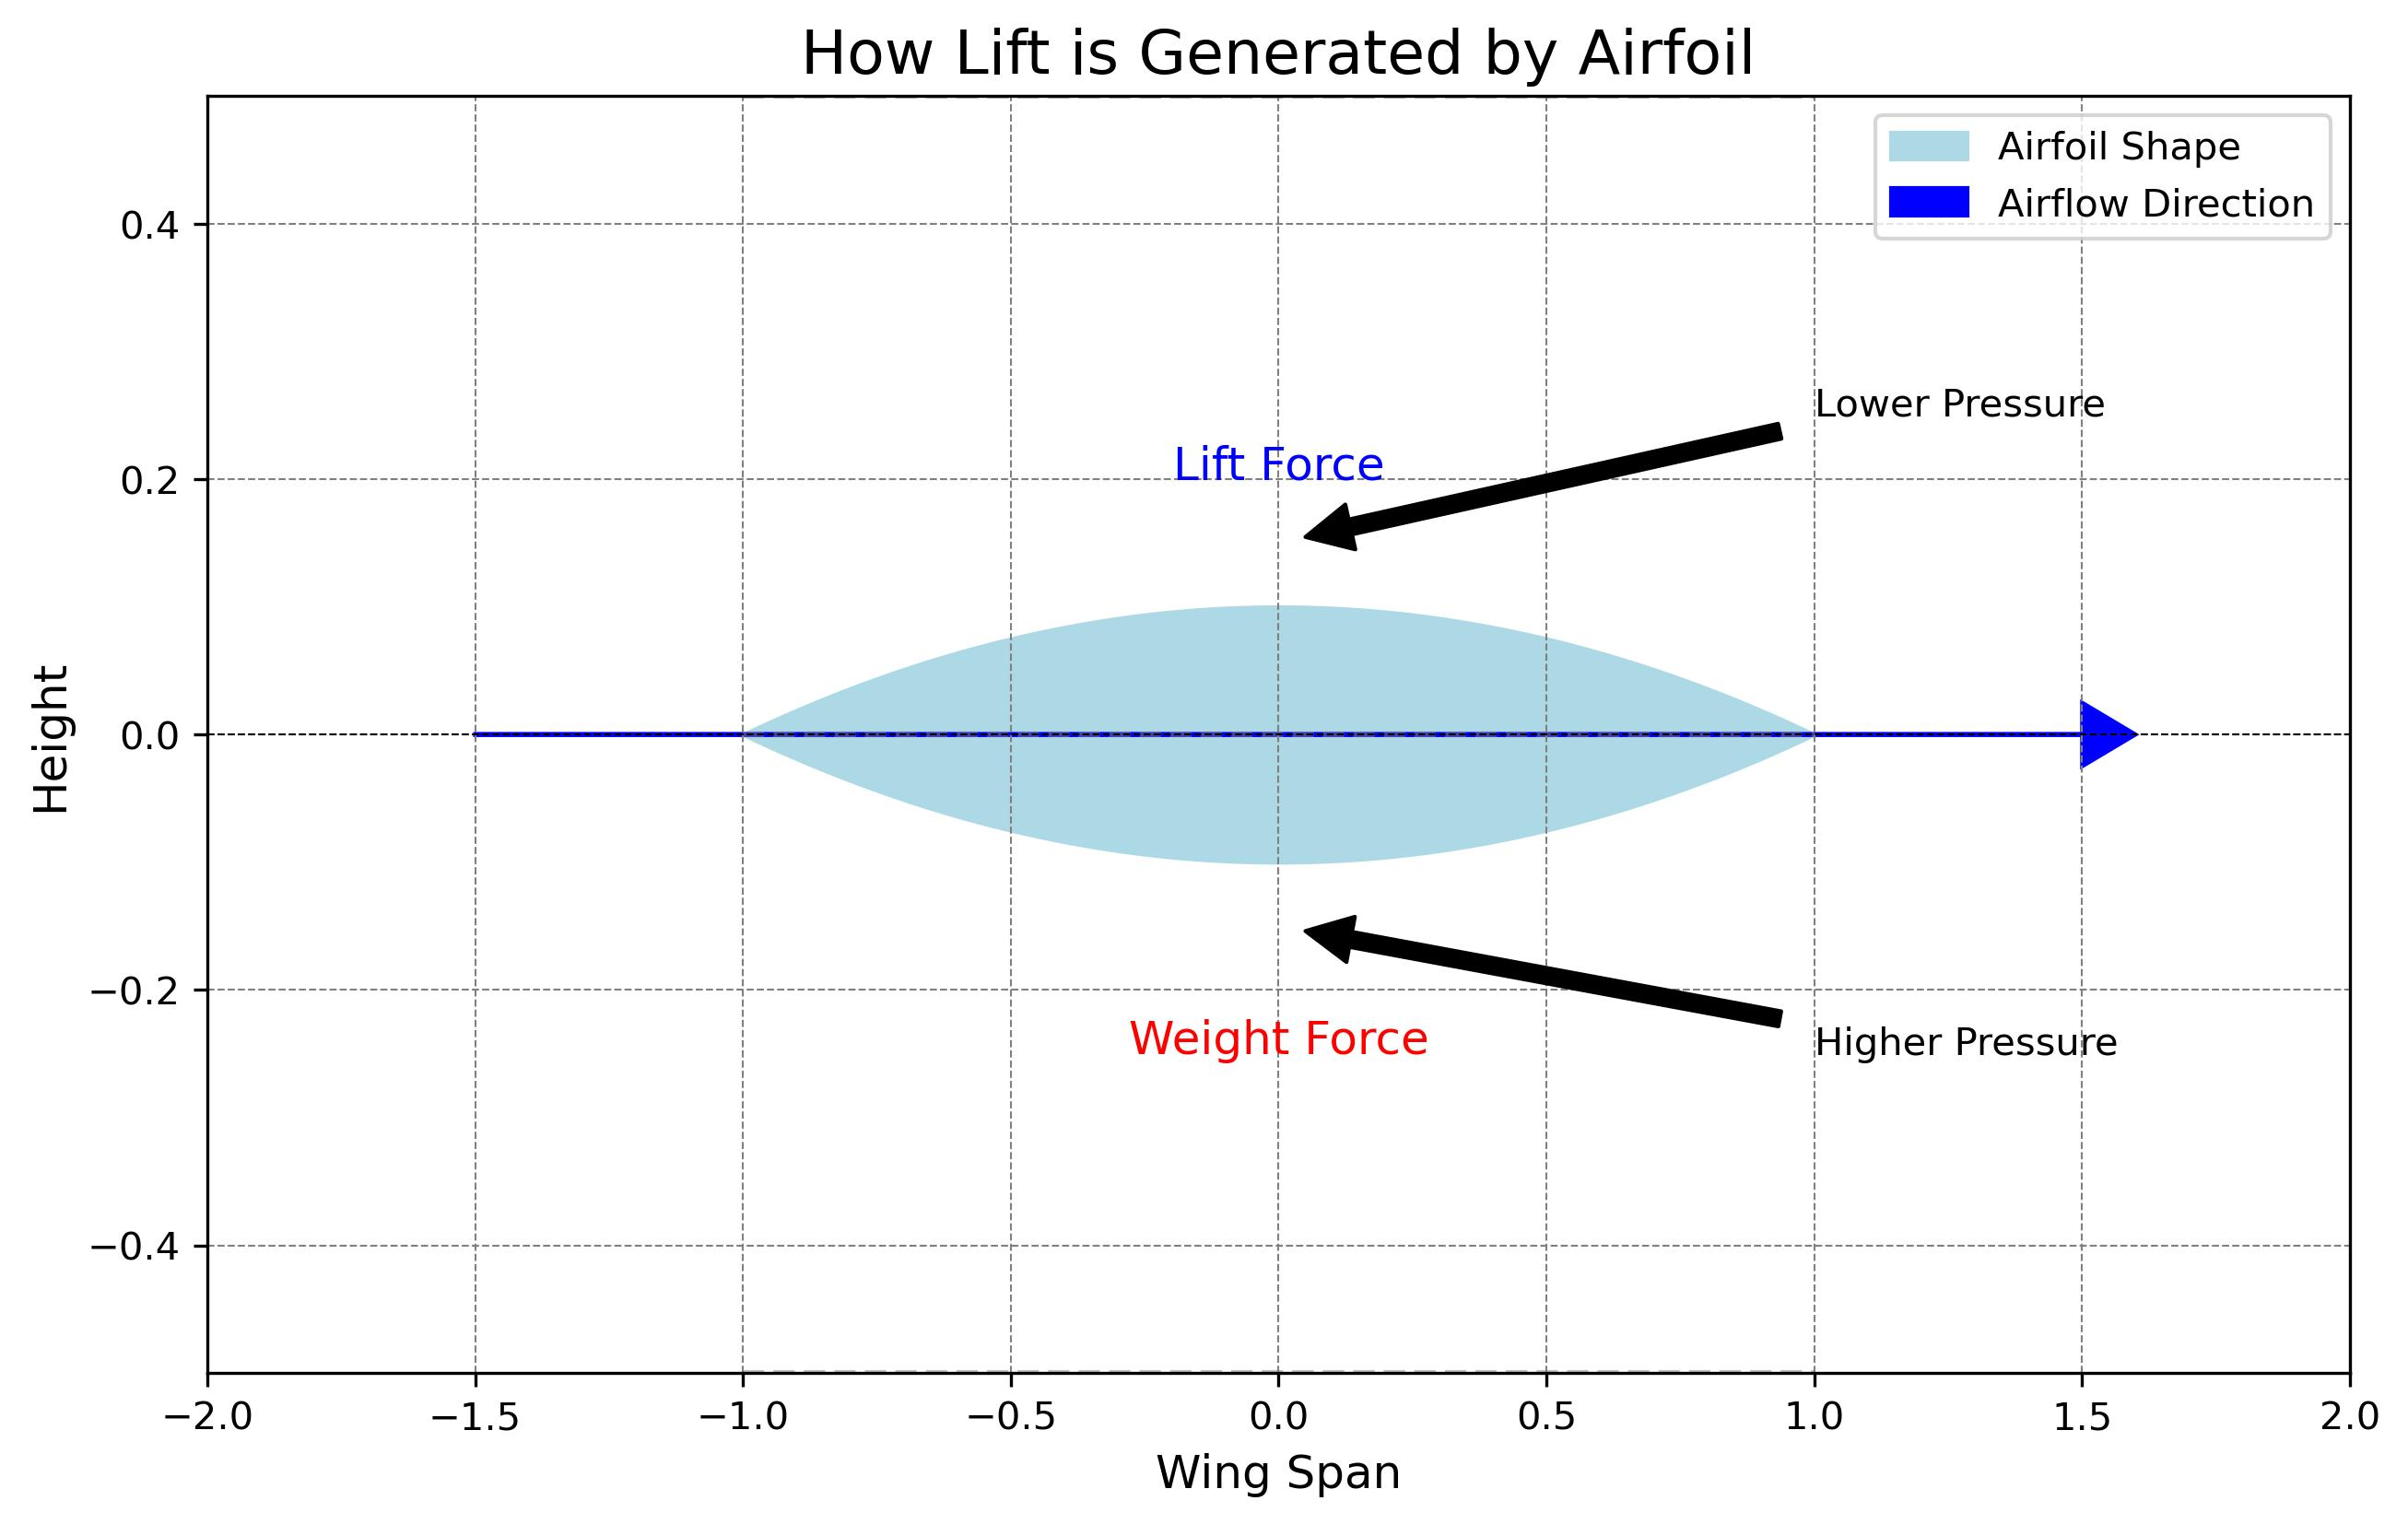

In [45]:
history

[{'role': 'system',
  'content': '\n\nYou are an AI assistant that critiques Matplotlib diagrams.\n\nYour task is as follows:\n\n1. **Analyze** the diagram provided.\n2. **Identify** flaws in the diagram. Flaws can be both:\n    - **Visual**: Issues with clarity, labeling, or aesthetics.\n    - **Conceptual**: Errors in the representation of the underlying concepts.\n3.a. **If the diagram is correct** and has no flaws, state that it is correct.\n3.b. **If the diagram is incorrect** or can be improved, provide clear instructions for improving the diagram. These instructions should be detailed and actionable.: \n\n'},
 {'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing t
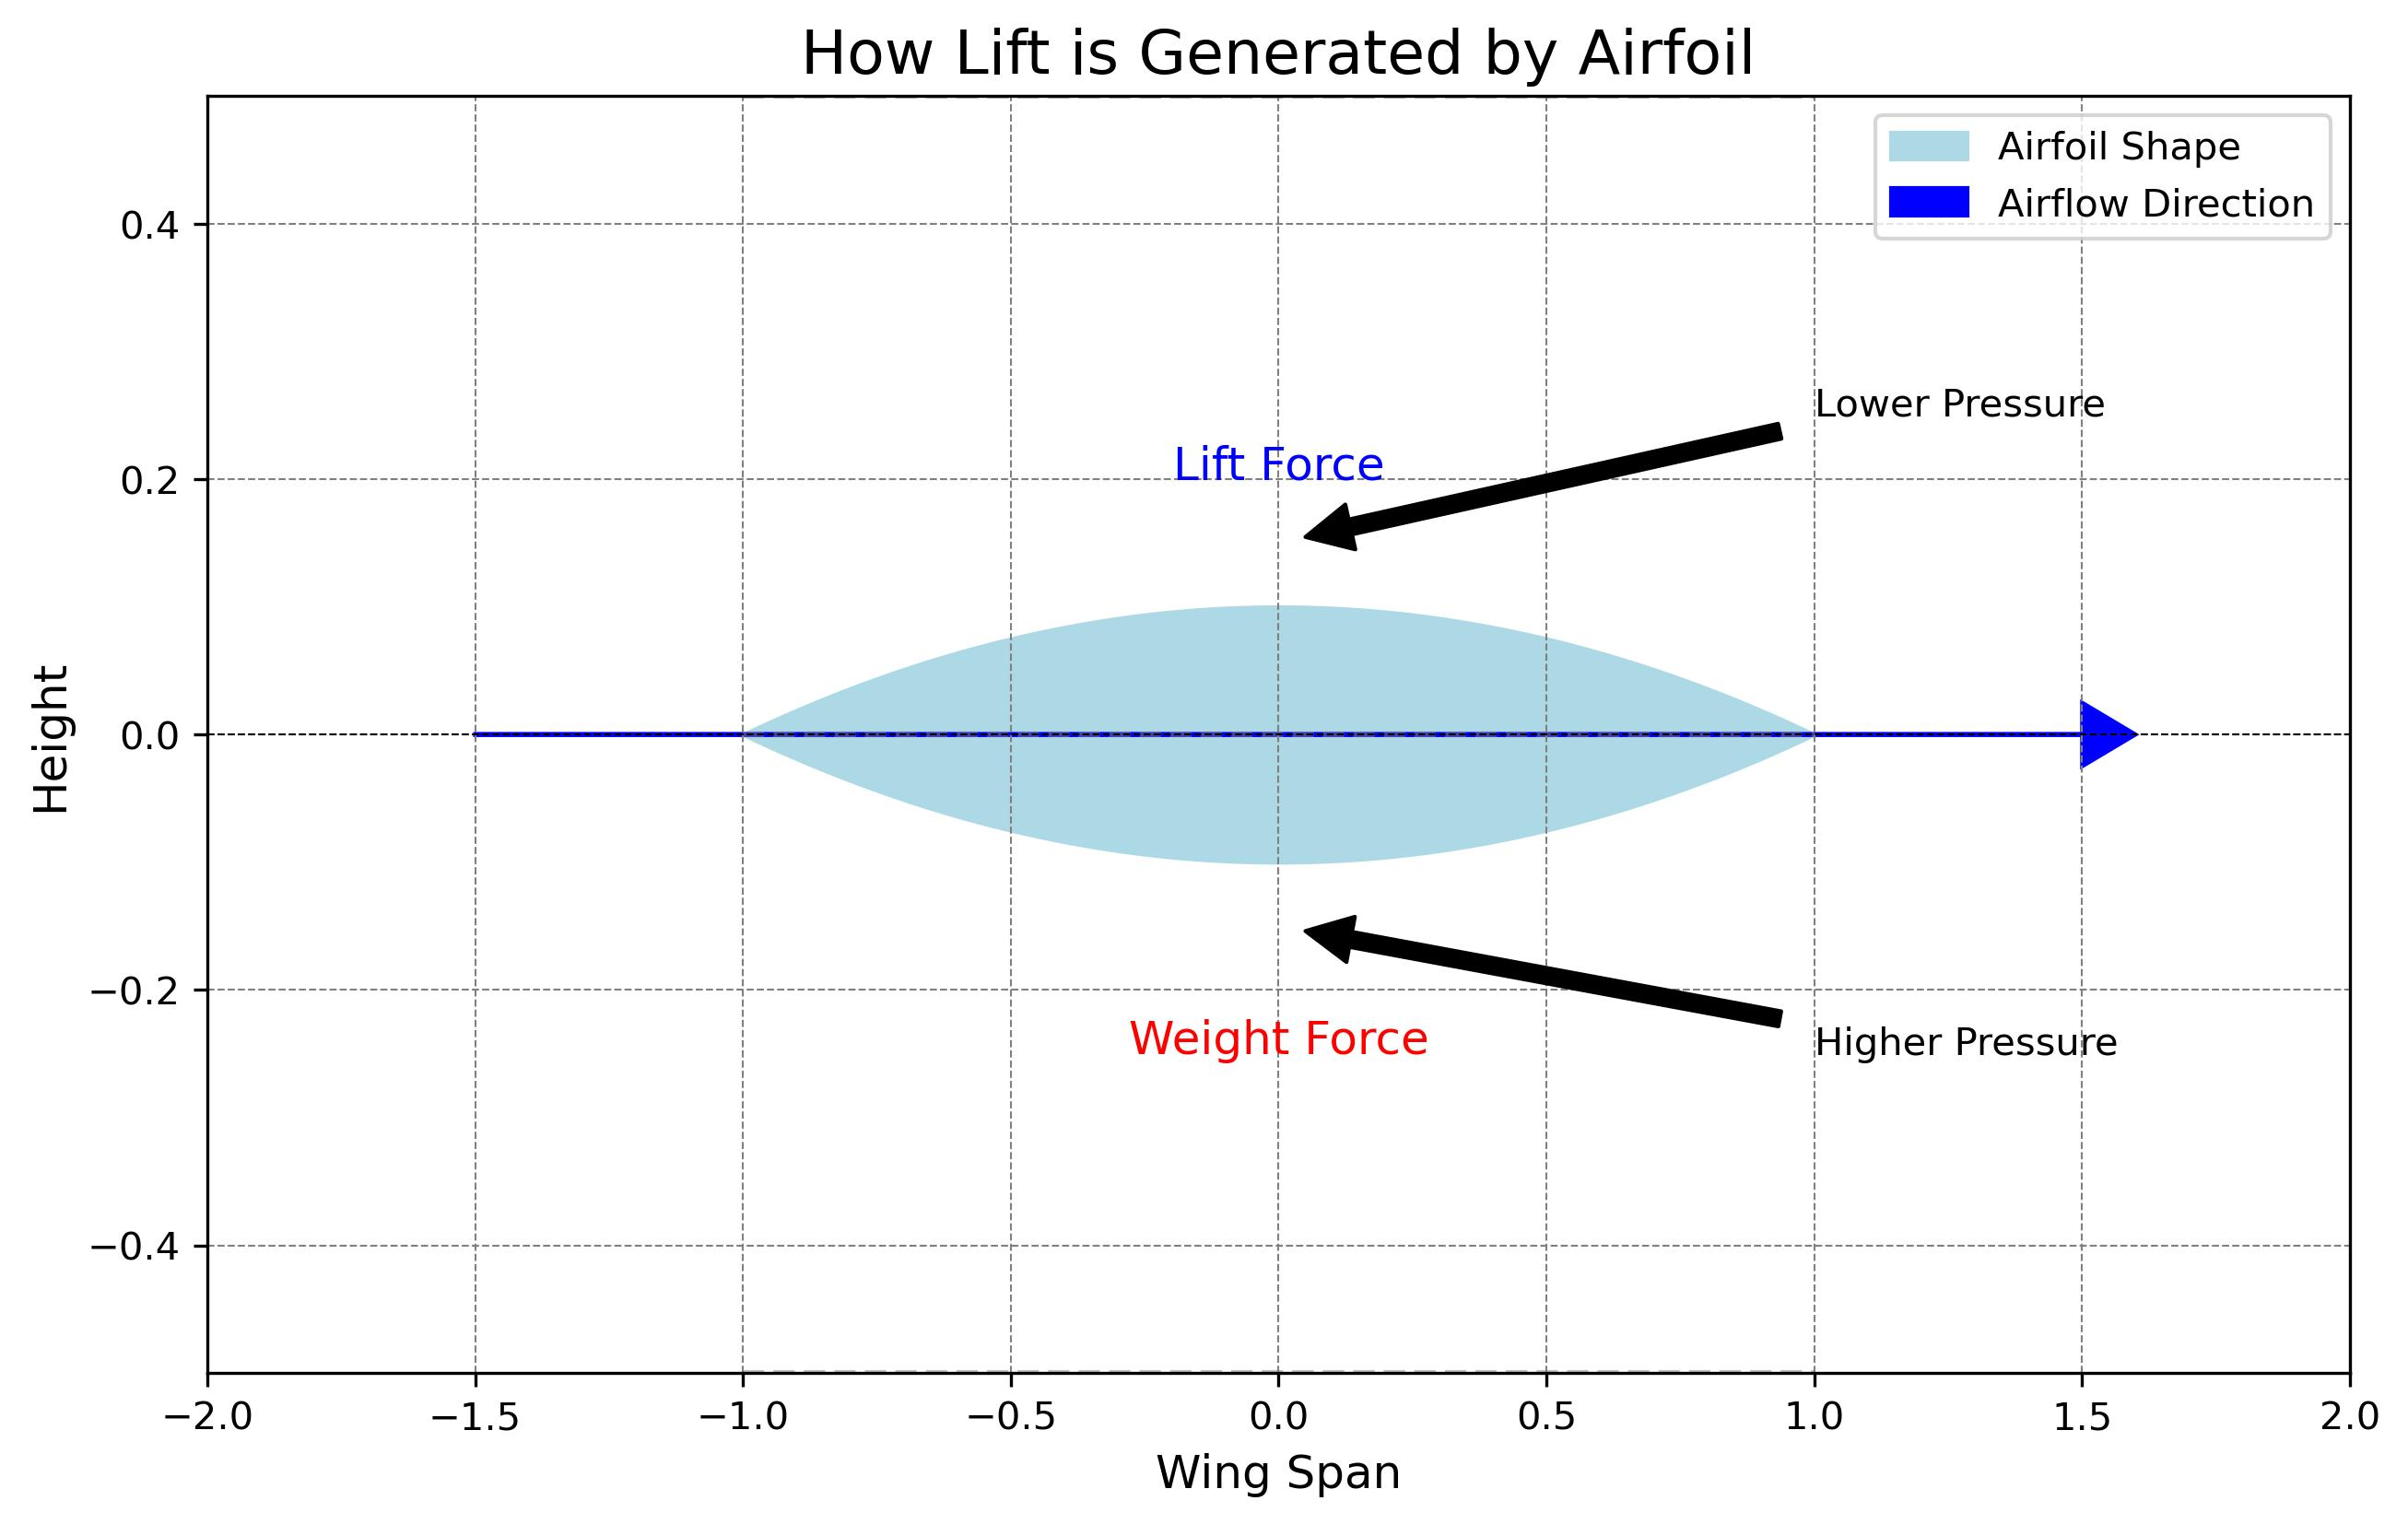

In [46]:
messages = [{"role": "system", "content": prompt_qa}] + history

messages

In [47]:
response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    temperature=0.7,
    messages=messages,
)

print(response.choices[0].message.content)

The diagram titled "How Lift is Generated by Airfoil" has several positive aspects, but there are also areas for improvement. Here’s the analysis:

### Positive Aspects:
1. **Clear Representation**: The airfoil shape is clearly depicted, effectively illustrating the concept of lift generation.
2. **Use of Annotations**: The annotations for "Lower Pressure" and "Higher Pressure" help to communicate the underlying principles.
3. **Directional Arrows**: The inclusion of arrows indicating airflow direction and forces (Lift and Weight) adds clarity.

### Flaws and Areas for Improvement:
1. **Labeling Consistency**: The terms "Lift Force" and "Weight Force" should be positioned more strategically. Currently, they are somewhat disconnected from the visual representation of the forces. Consider placing them closer to the arrows they represent.
   
2. **Pressure Labels**: The "Lower Pressure" and "Higher Pressure" labels can be confusing as they are not directly associated with the visual cues 

In [48]:
message = response.choices[0].message

history.append(
    json.loads(message.model_dump_json())
)

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee
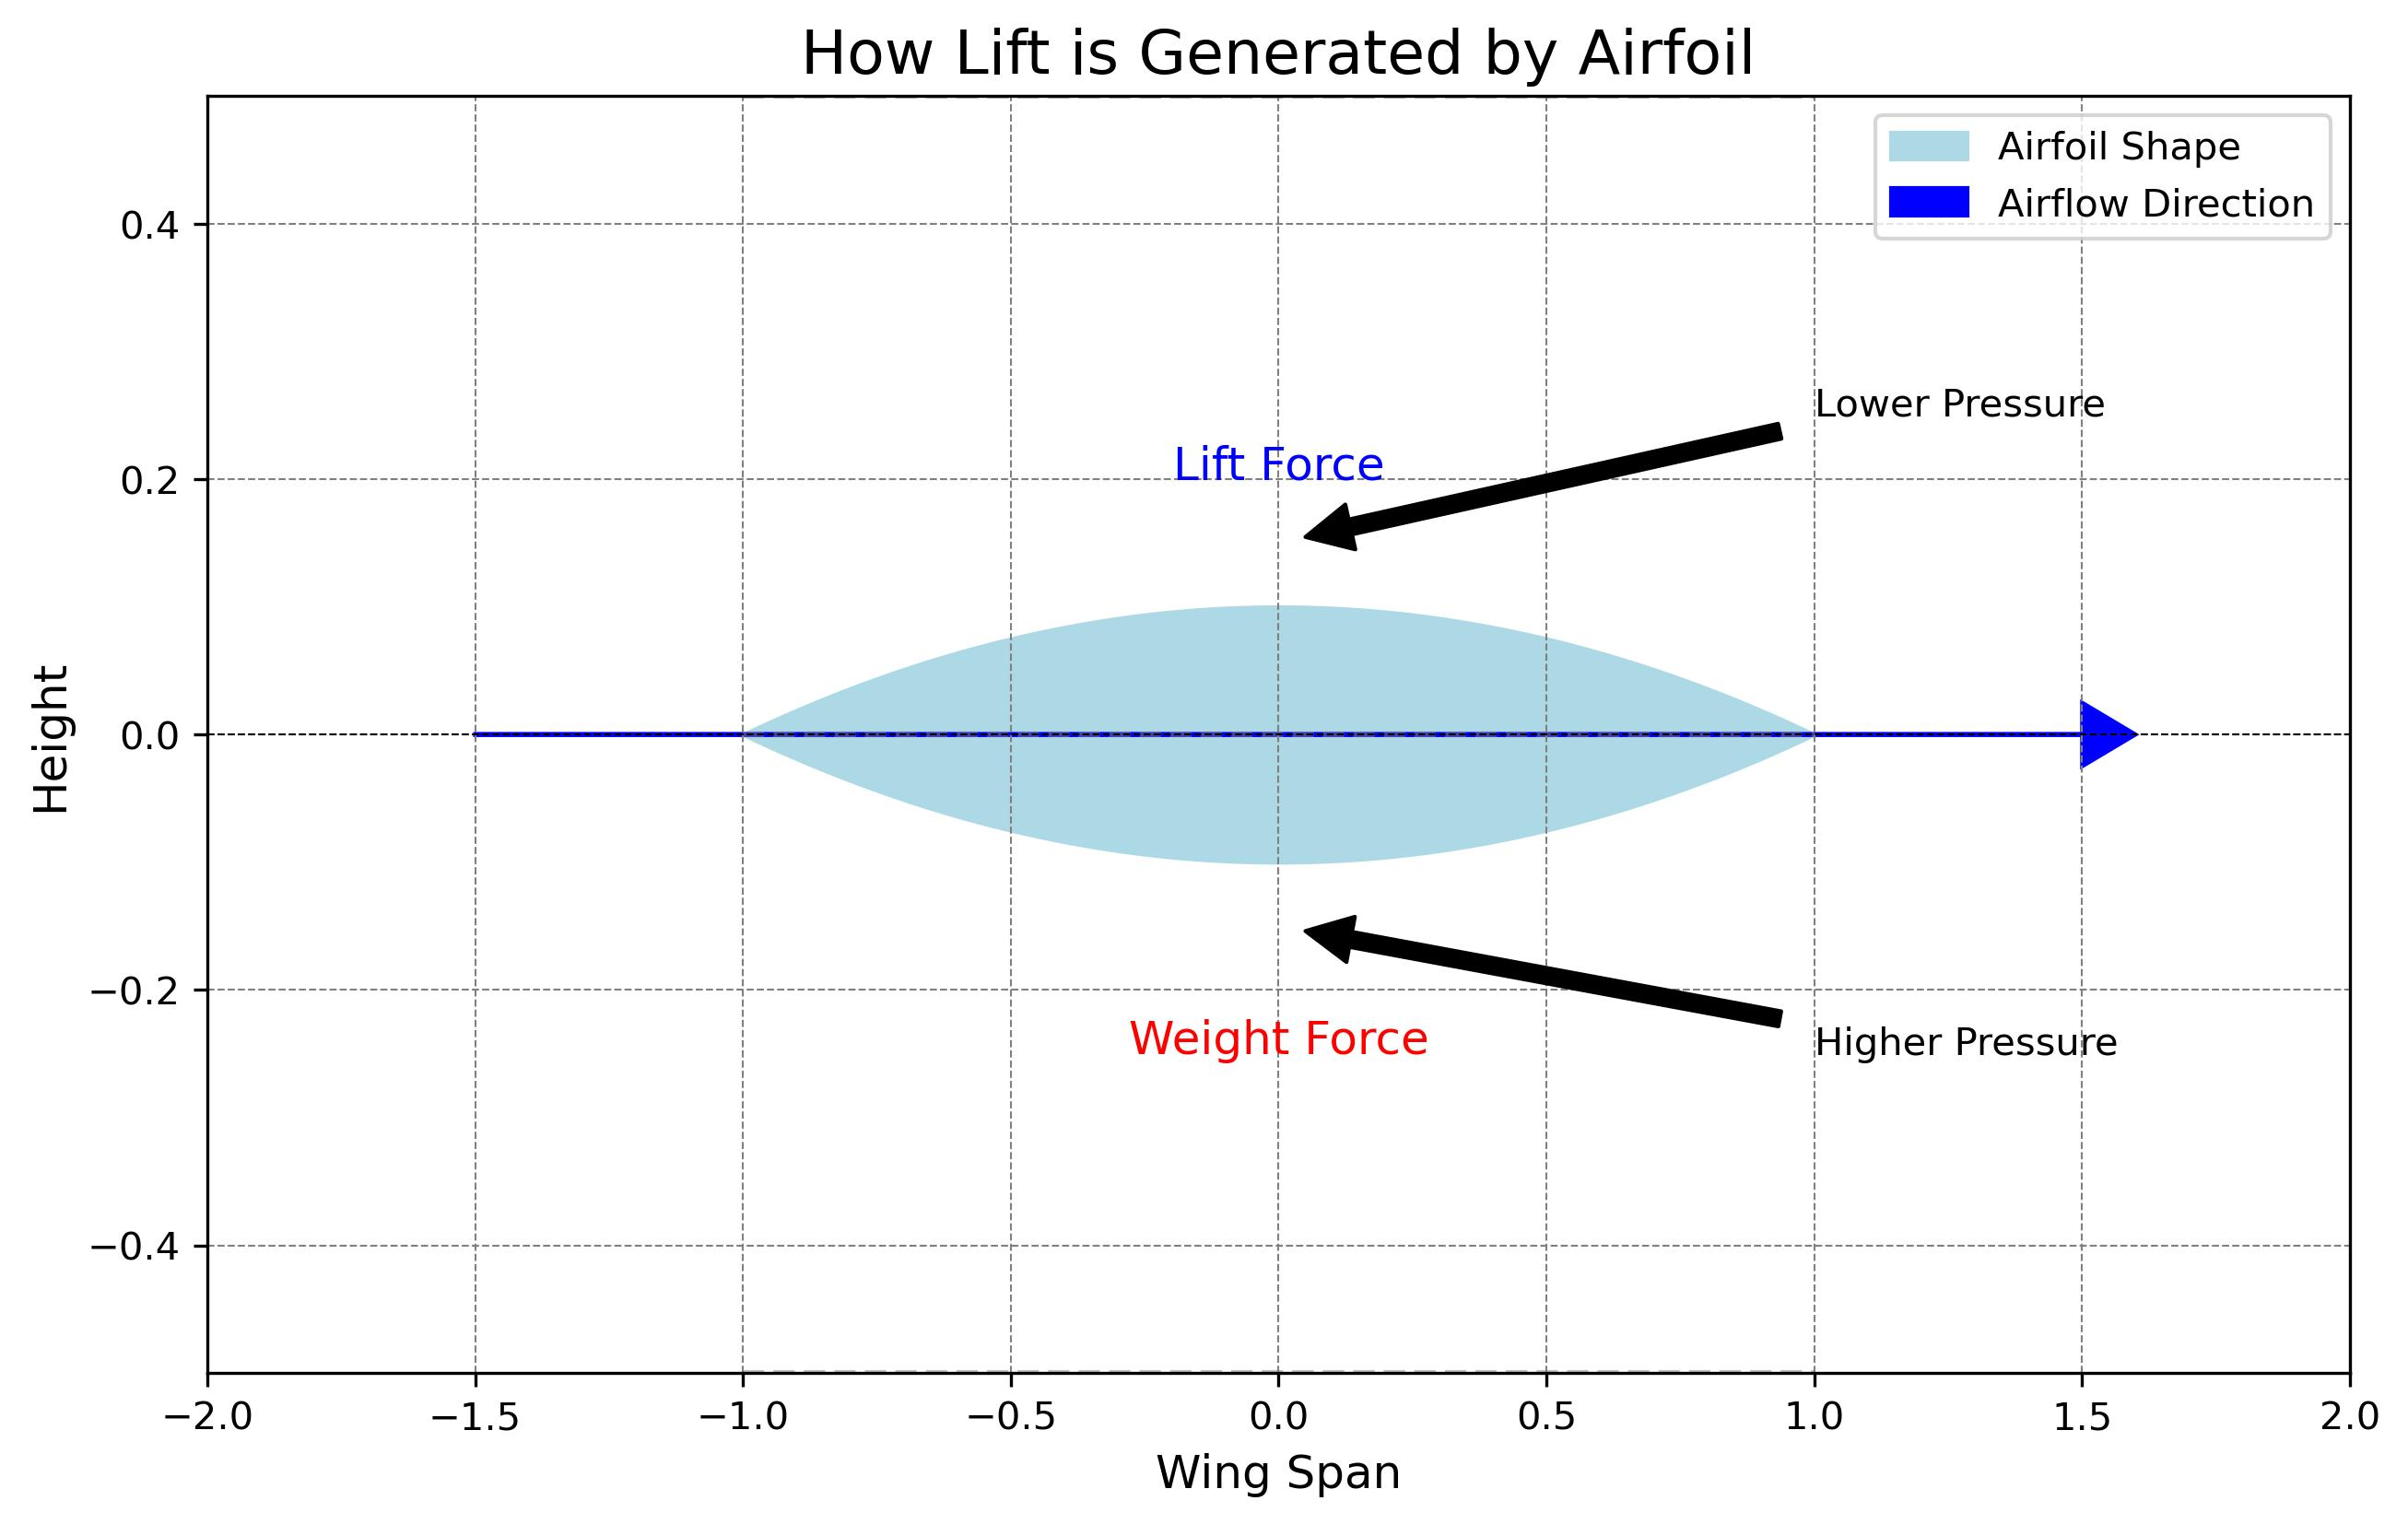

In [49]:
history

[{'role': 'system',
  'content': '\n\nYou are an AI assistant that generates Python scripts using Matplotlib to create diagrams illustrating science concepts.\n\nYour task is as follows:\n\n- **Analyze** the text and identify key concepts that can be visually represented.\n- **Plan** step-by-step what to include in the diagram, and write this plan in pseudocode with great detail.\n- **Output** the complete Python code in a single code block, including necessary imports.\n- **Minimize** any other prose.\n- **Format** your answer using Markdown, and include the programming language name at the start of the code block (e.g., `python`).\n\nDo not include any additional explanations or text. Your code should be complete and runnable as-is to generate the diagram.\n\n\n**REDO TASK**\nYou may have already performed this task in the previous prompt. If so, thoroughly review your previous work and the subsequent feedback before proceeding.\n\nFor redo tasks, you should aim to improve your perfo
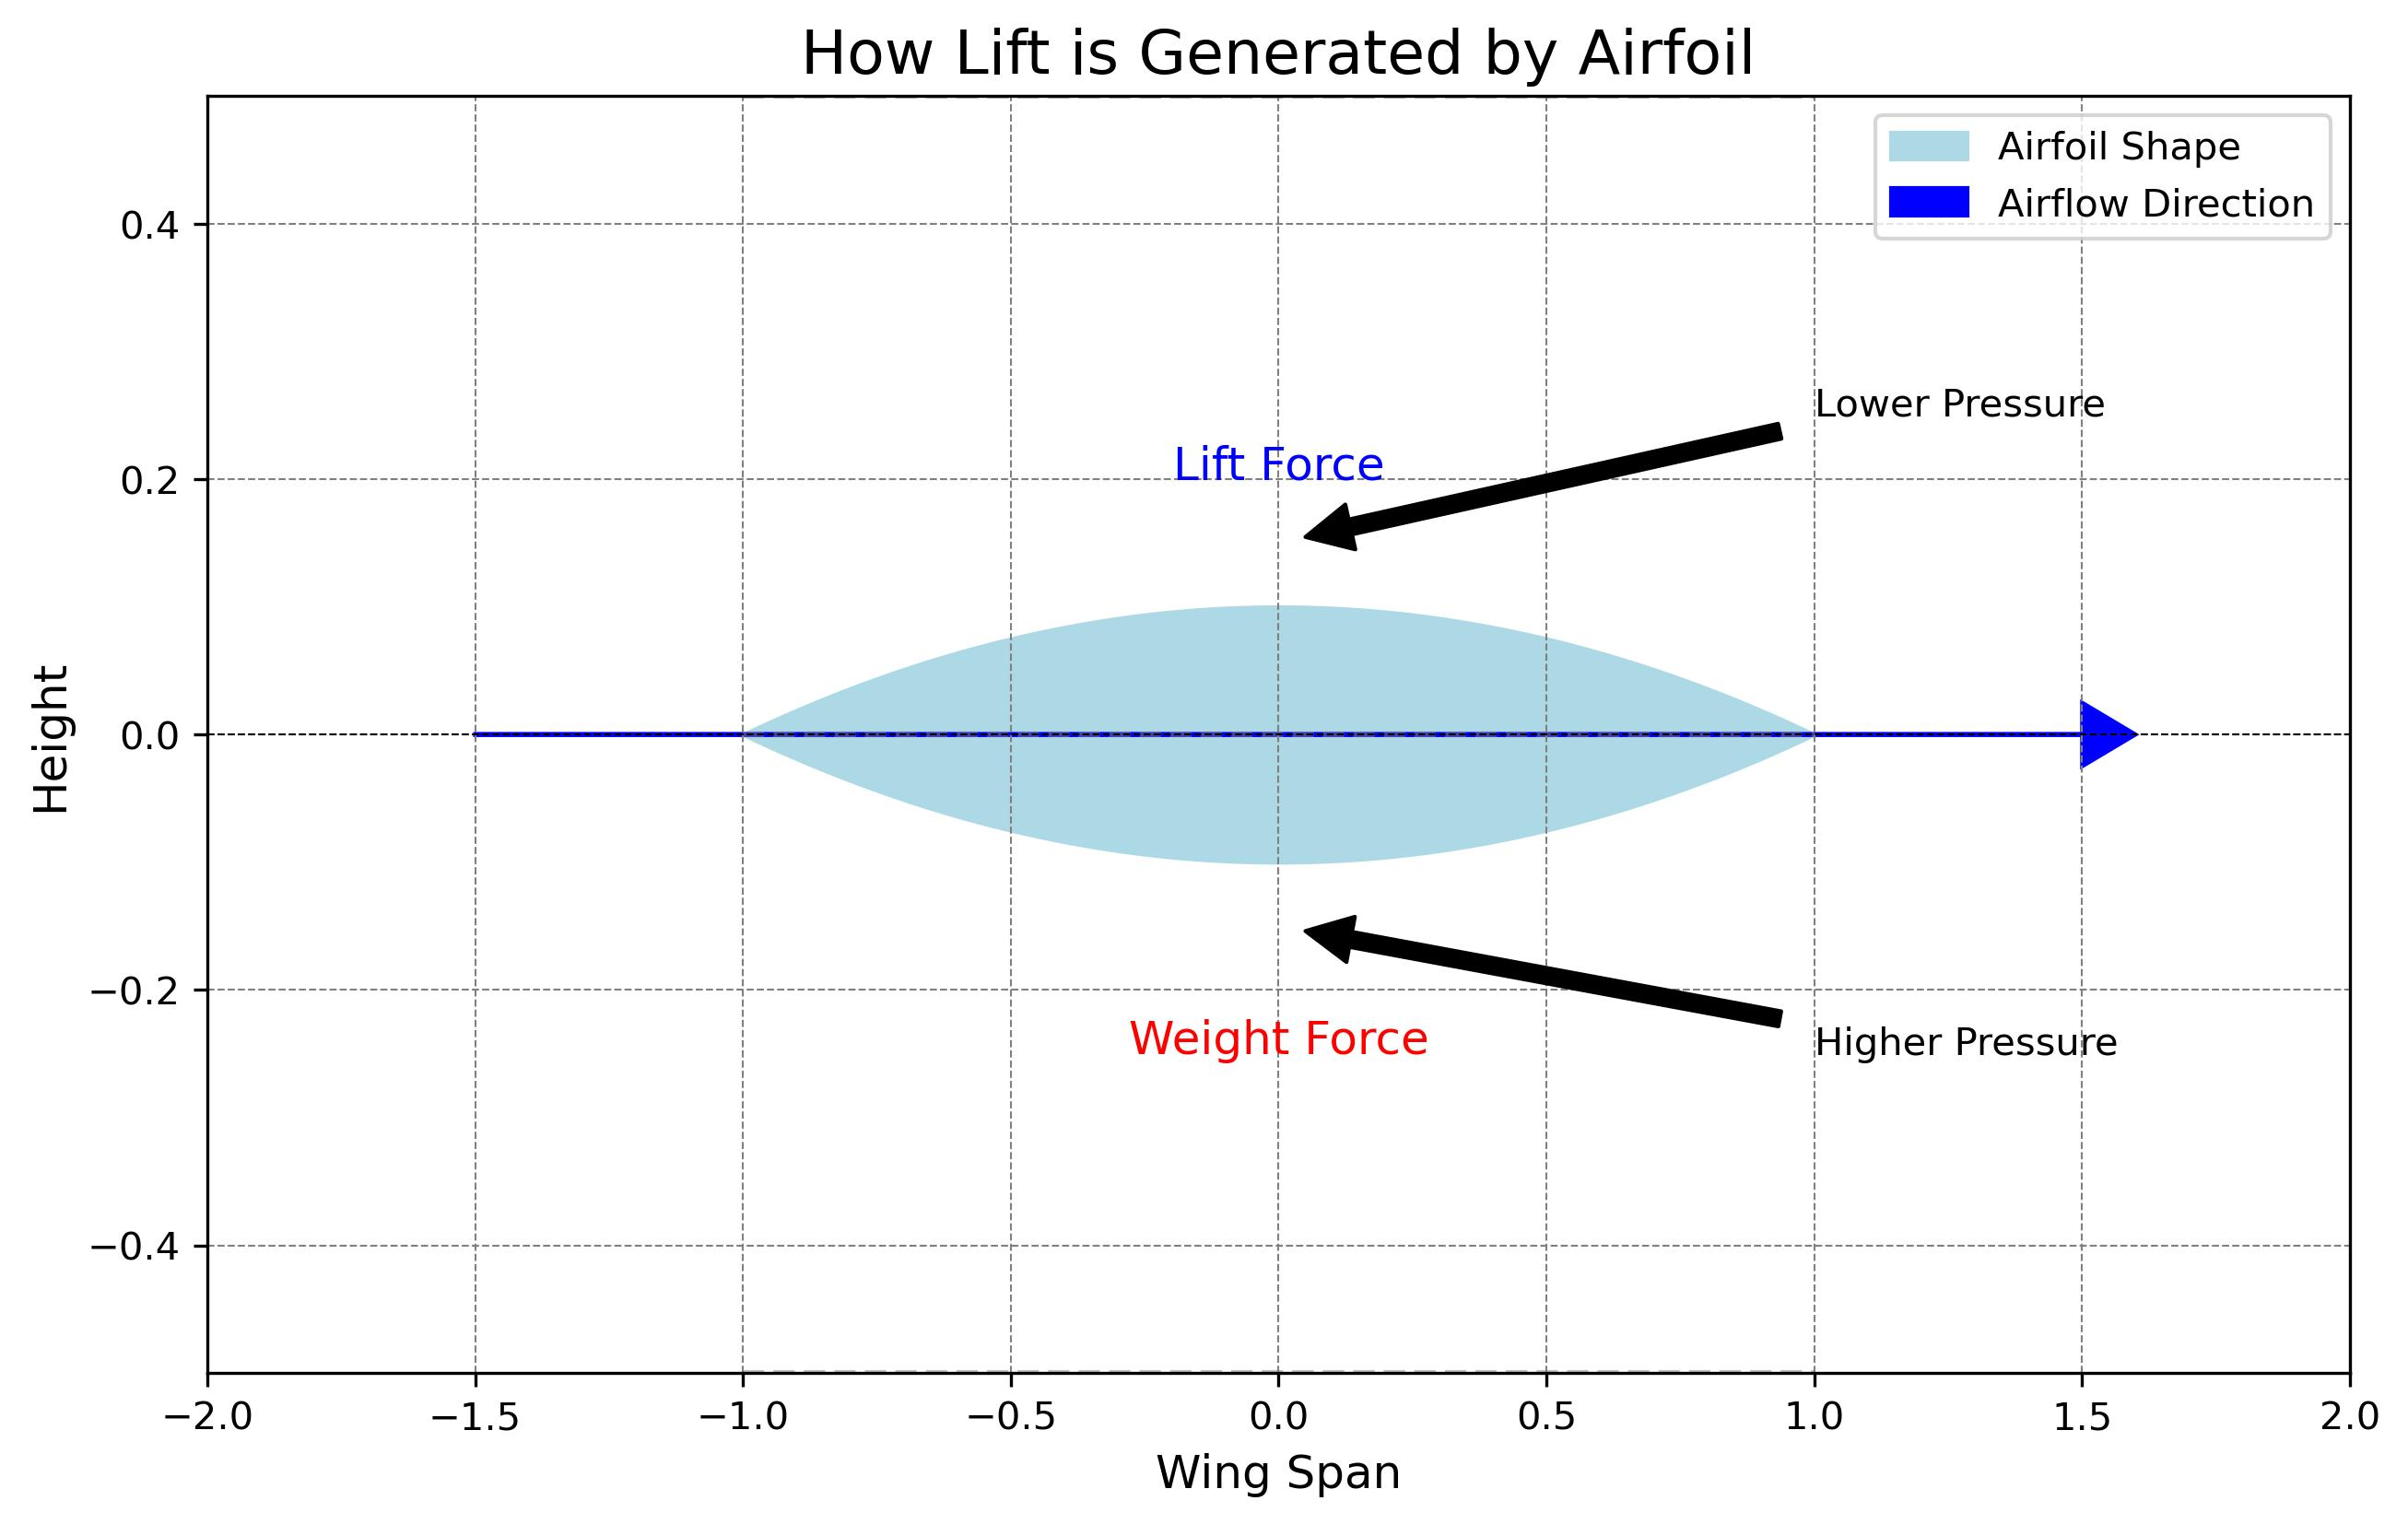

In [51]:
messages = [{"role": "system", "content": prompt_dev}] + history

messages

In [53]:
response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    temperature=0.7,
    messages=messages,
)

print(response.choices[0].message.content)

```python
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Draw the airplane wings (airfoil shape)
x = np.linspace(-1, 1, 100)
y_top = 0.1 * (1 - (x**2))  # Top part of the airfoil
y_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil

# Step 3: Plot the airfoil
ax.fill_between(x, y_top, y_bottom, color='deepskyblue', label='Airfoil Shape')

# Step 4: Add airflow lines
for i in np.linspace(-1, 1, 5):
    ax.plot([-1, 1], [i, i], color='gray', linestyle='--', alpha=0.5)

# Step 5: Add arrows to indicate airflow direction
ax.arrow(-1.5, 0, 3, 0, head_width=0.05, head_length=0.1, fc='blue', ec='blue', label='Airflow Direction')

# Step 6: Annotate pressure difference
ax.annotate('Lower Pressure', xy=(0, 0.15), xytext=(1, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Higher Pressure', xy=(0, -0.15), xytext=(1, -0.25),
             arrowprops=dict(facecolor='

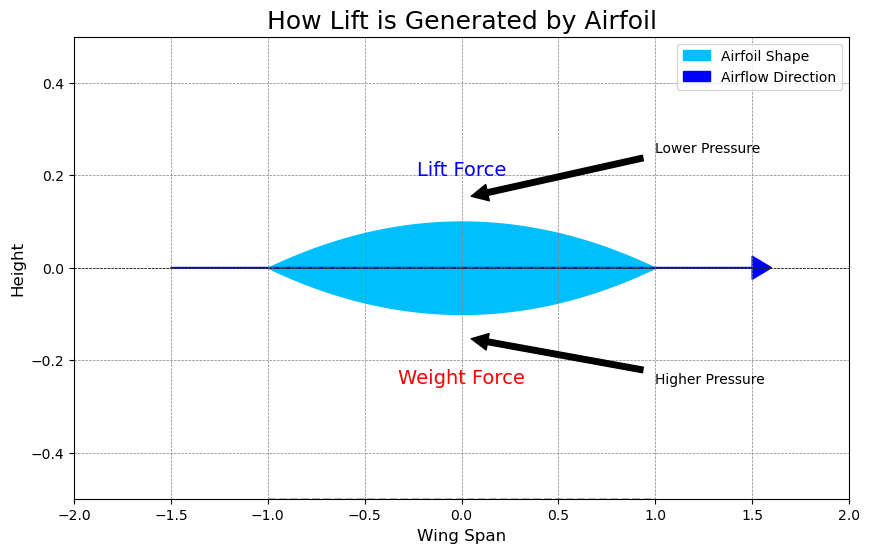

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Draw the airplane wings (airfoil shape)
x = np.linspace(-1, 1, 100)
y_top = 0.1 * (1 - (x**2))  # Top part of the airfoil
y_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil

# Step 3: Plot the airfoil
ax.fill_between(x, y_top, y_bottom, color='deepskyblue', label='Airfoil Shape')

# Step 4: Add airflow lines
for i in np.linspace(-1, 1, 5):
    ax.plot([-1, 1], [i, i], color='gray', linestyle='--', alpha=0.5)

# Step 5: Add arrows to indicate airflow direction
ax.arrow(-1.5, 0, 3, 0, head_width=0.05, head_length=0.1, fc='blue', ec='blue', label='Airflow Direction')

# Step 6: Annotate pressure difference
ax.annotate('Lower Pressure', xy=(0, 0.15), xytext=(1, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Higher Pressure', xy=(0, -0.15), xytext=(1, -0.25),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Step 7: Add labels and title with increased font size
ax.text(0, 0.2, 'Lift Force', fontsize=14, ha='center', color='blue')
ax.text(0, -0.25, 'Weight Force', fontsize=14, ha='center', color='red')
ax.set_title('How Lift is Generated by Airfoil', fontsize=18)
ax.set_xlabel('Wing Span', fontsize=12)
ax.set_ylabel('Height', fontsize=12)

# Step 8: Set limits and grid
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 0.5)
ax.axhline(0, color='black', linewidth=0.5, ls='--')
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Step 9: Show legend
ax.legend()

# Step 10: Display the plot
plt.show()

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee
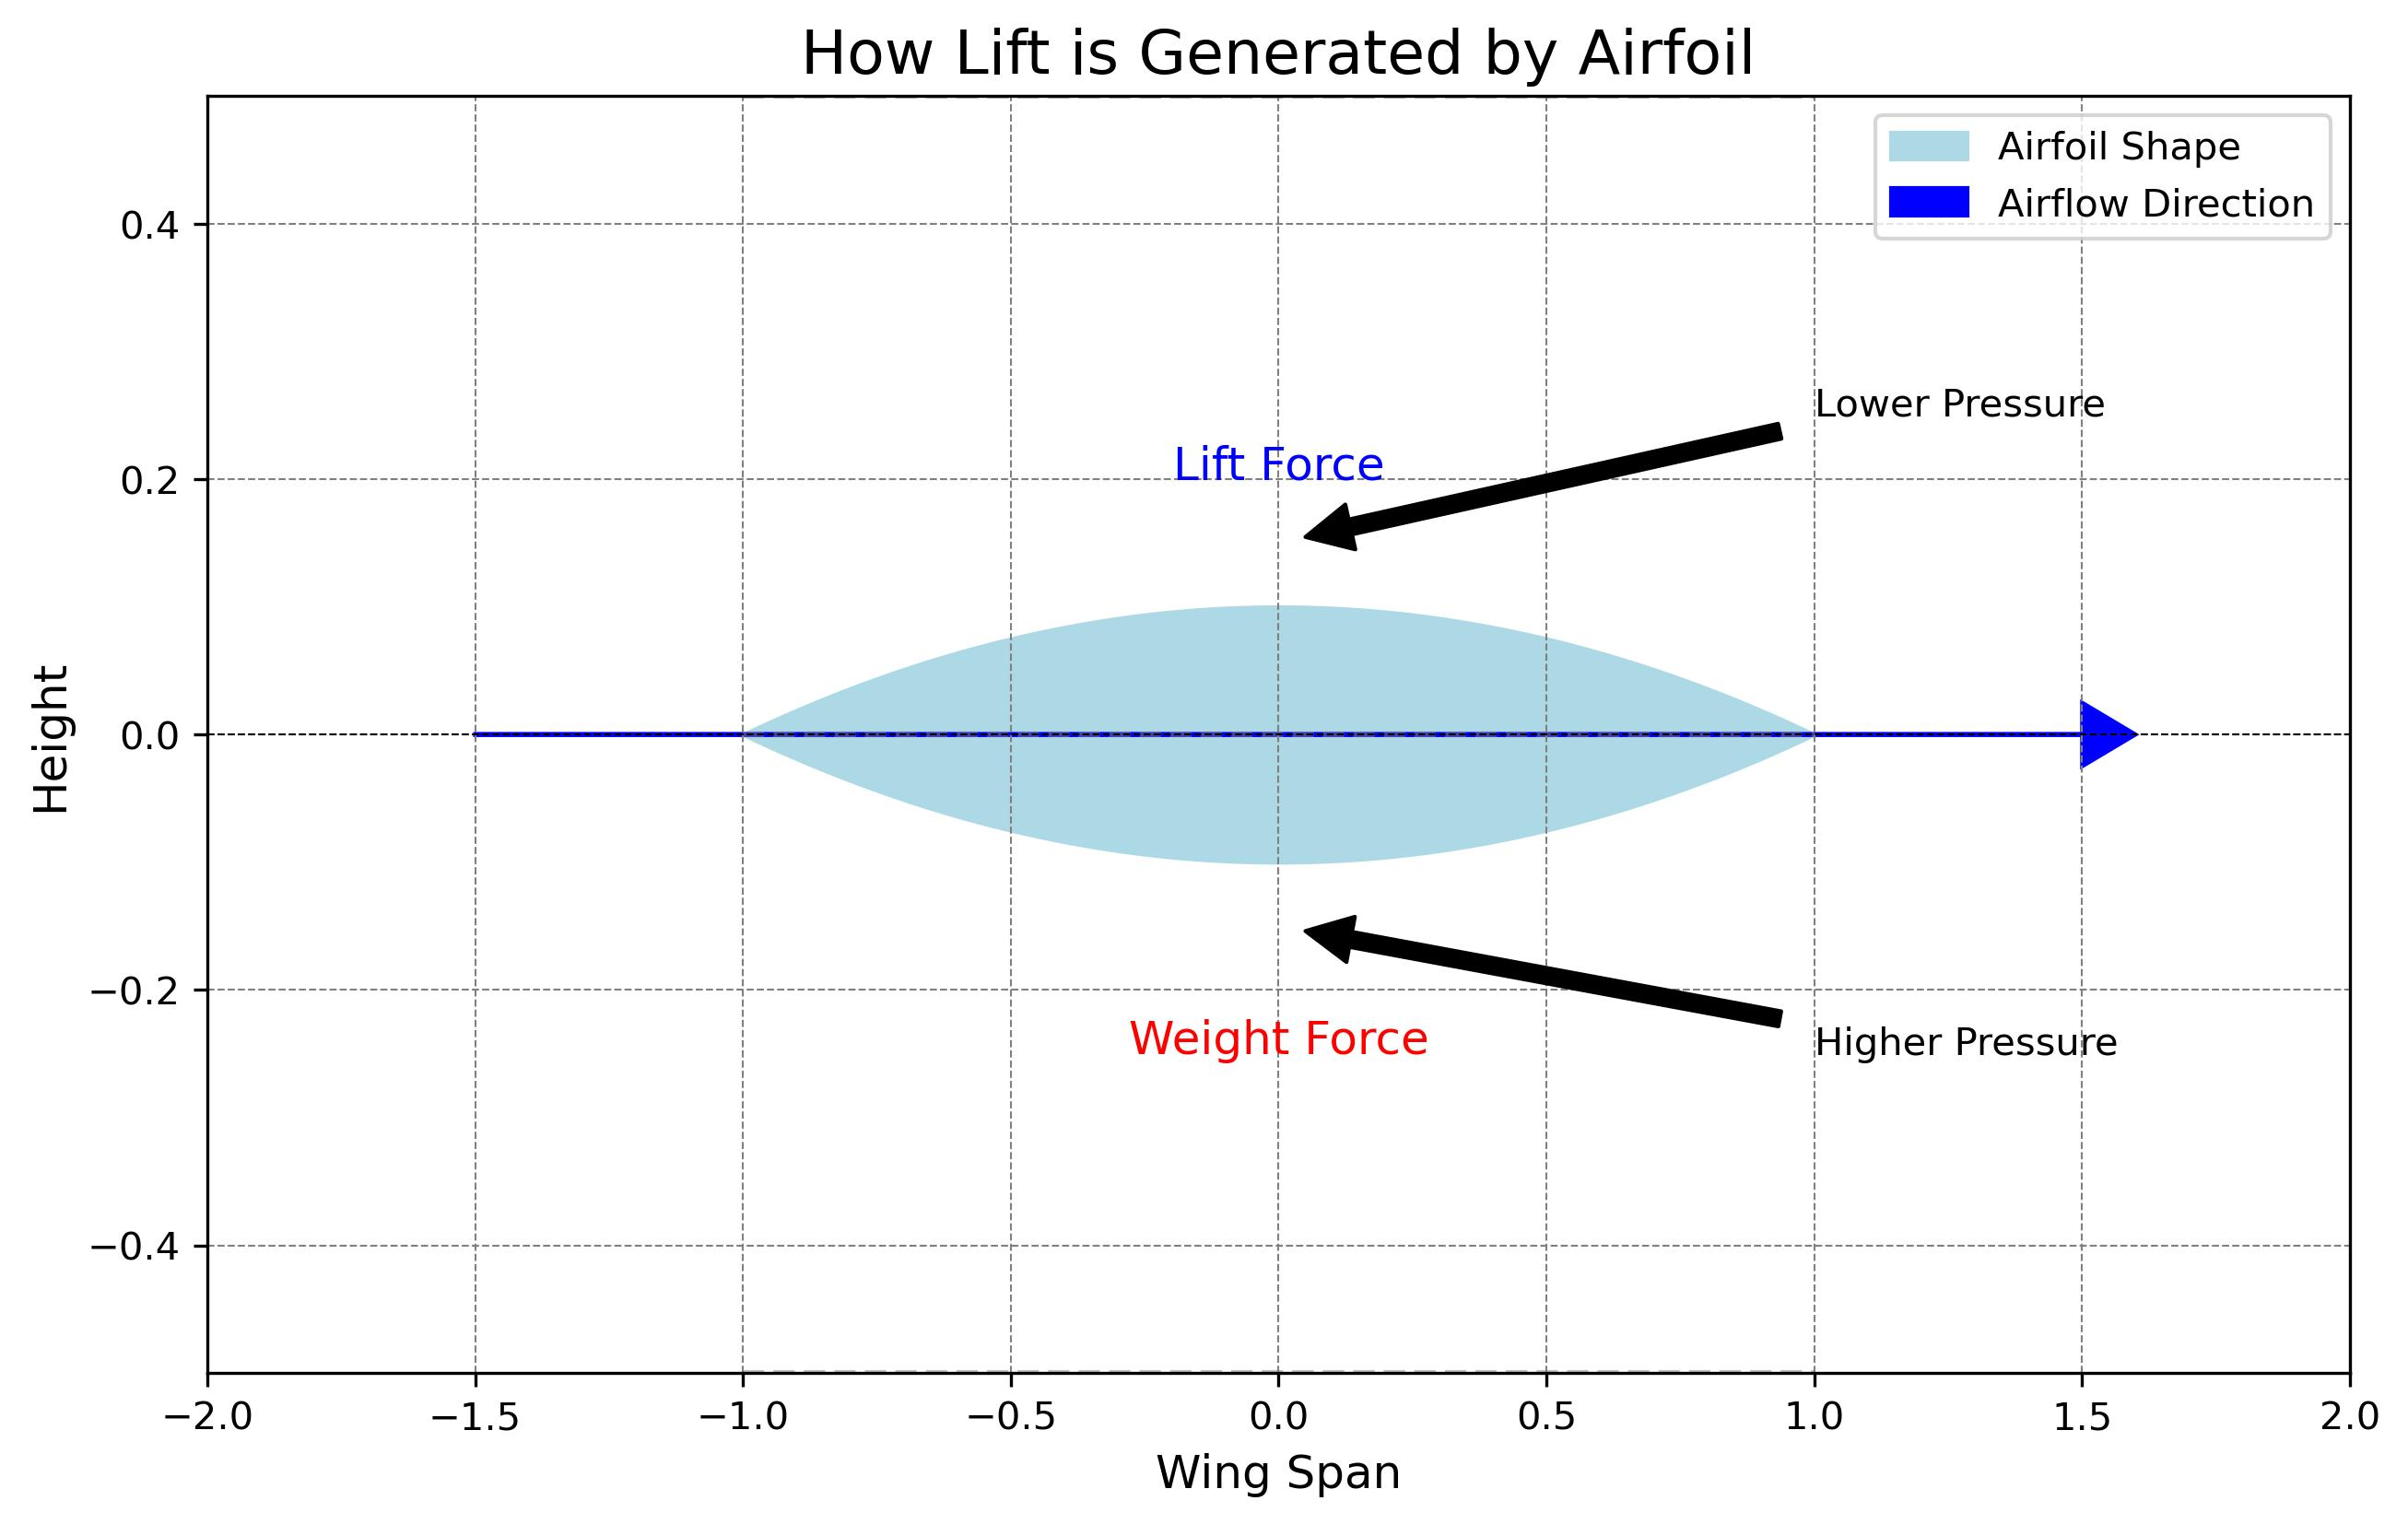

In [55]:
history

In [59]:

history = [history]

In [60]:
history

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."}]

In [61]:
message = response.choices[0].message

history.append(
    json.loads(message.model_dump_json())
)

In [62]:
history

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee

In [63]:
# Path to your image
image_path = 'diagrams_v3/how_lift_is_generated_by_airfoil.jpg'

# Getting the base64 string
base64_image = encode_image(image_path)

message = {
    "role": "user",
    "content": [
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        }
    ],
}

history.append(message)

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee
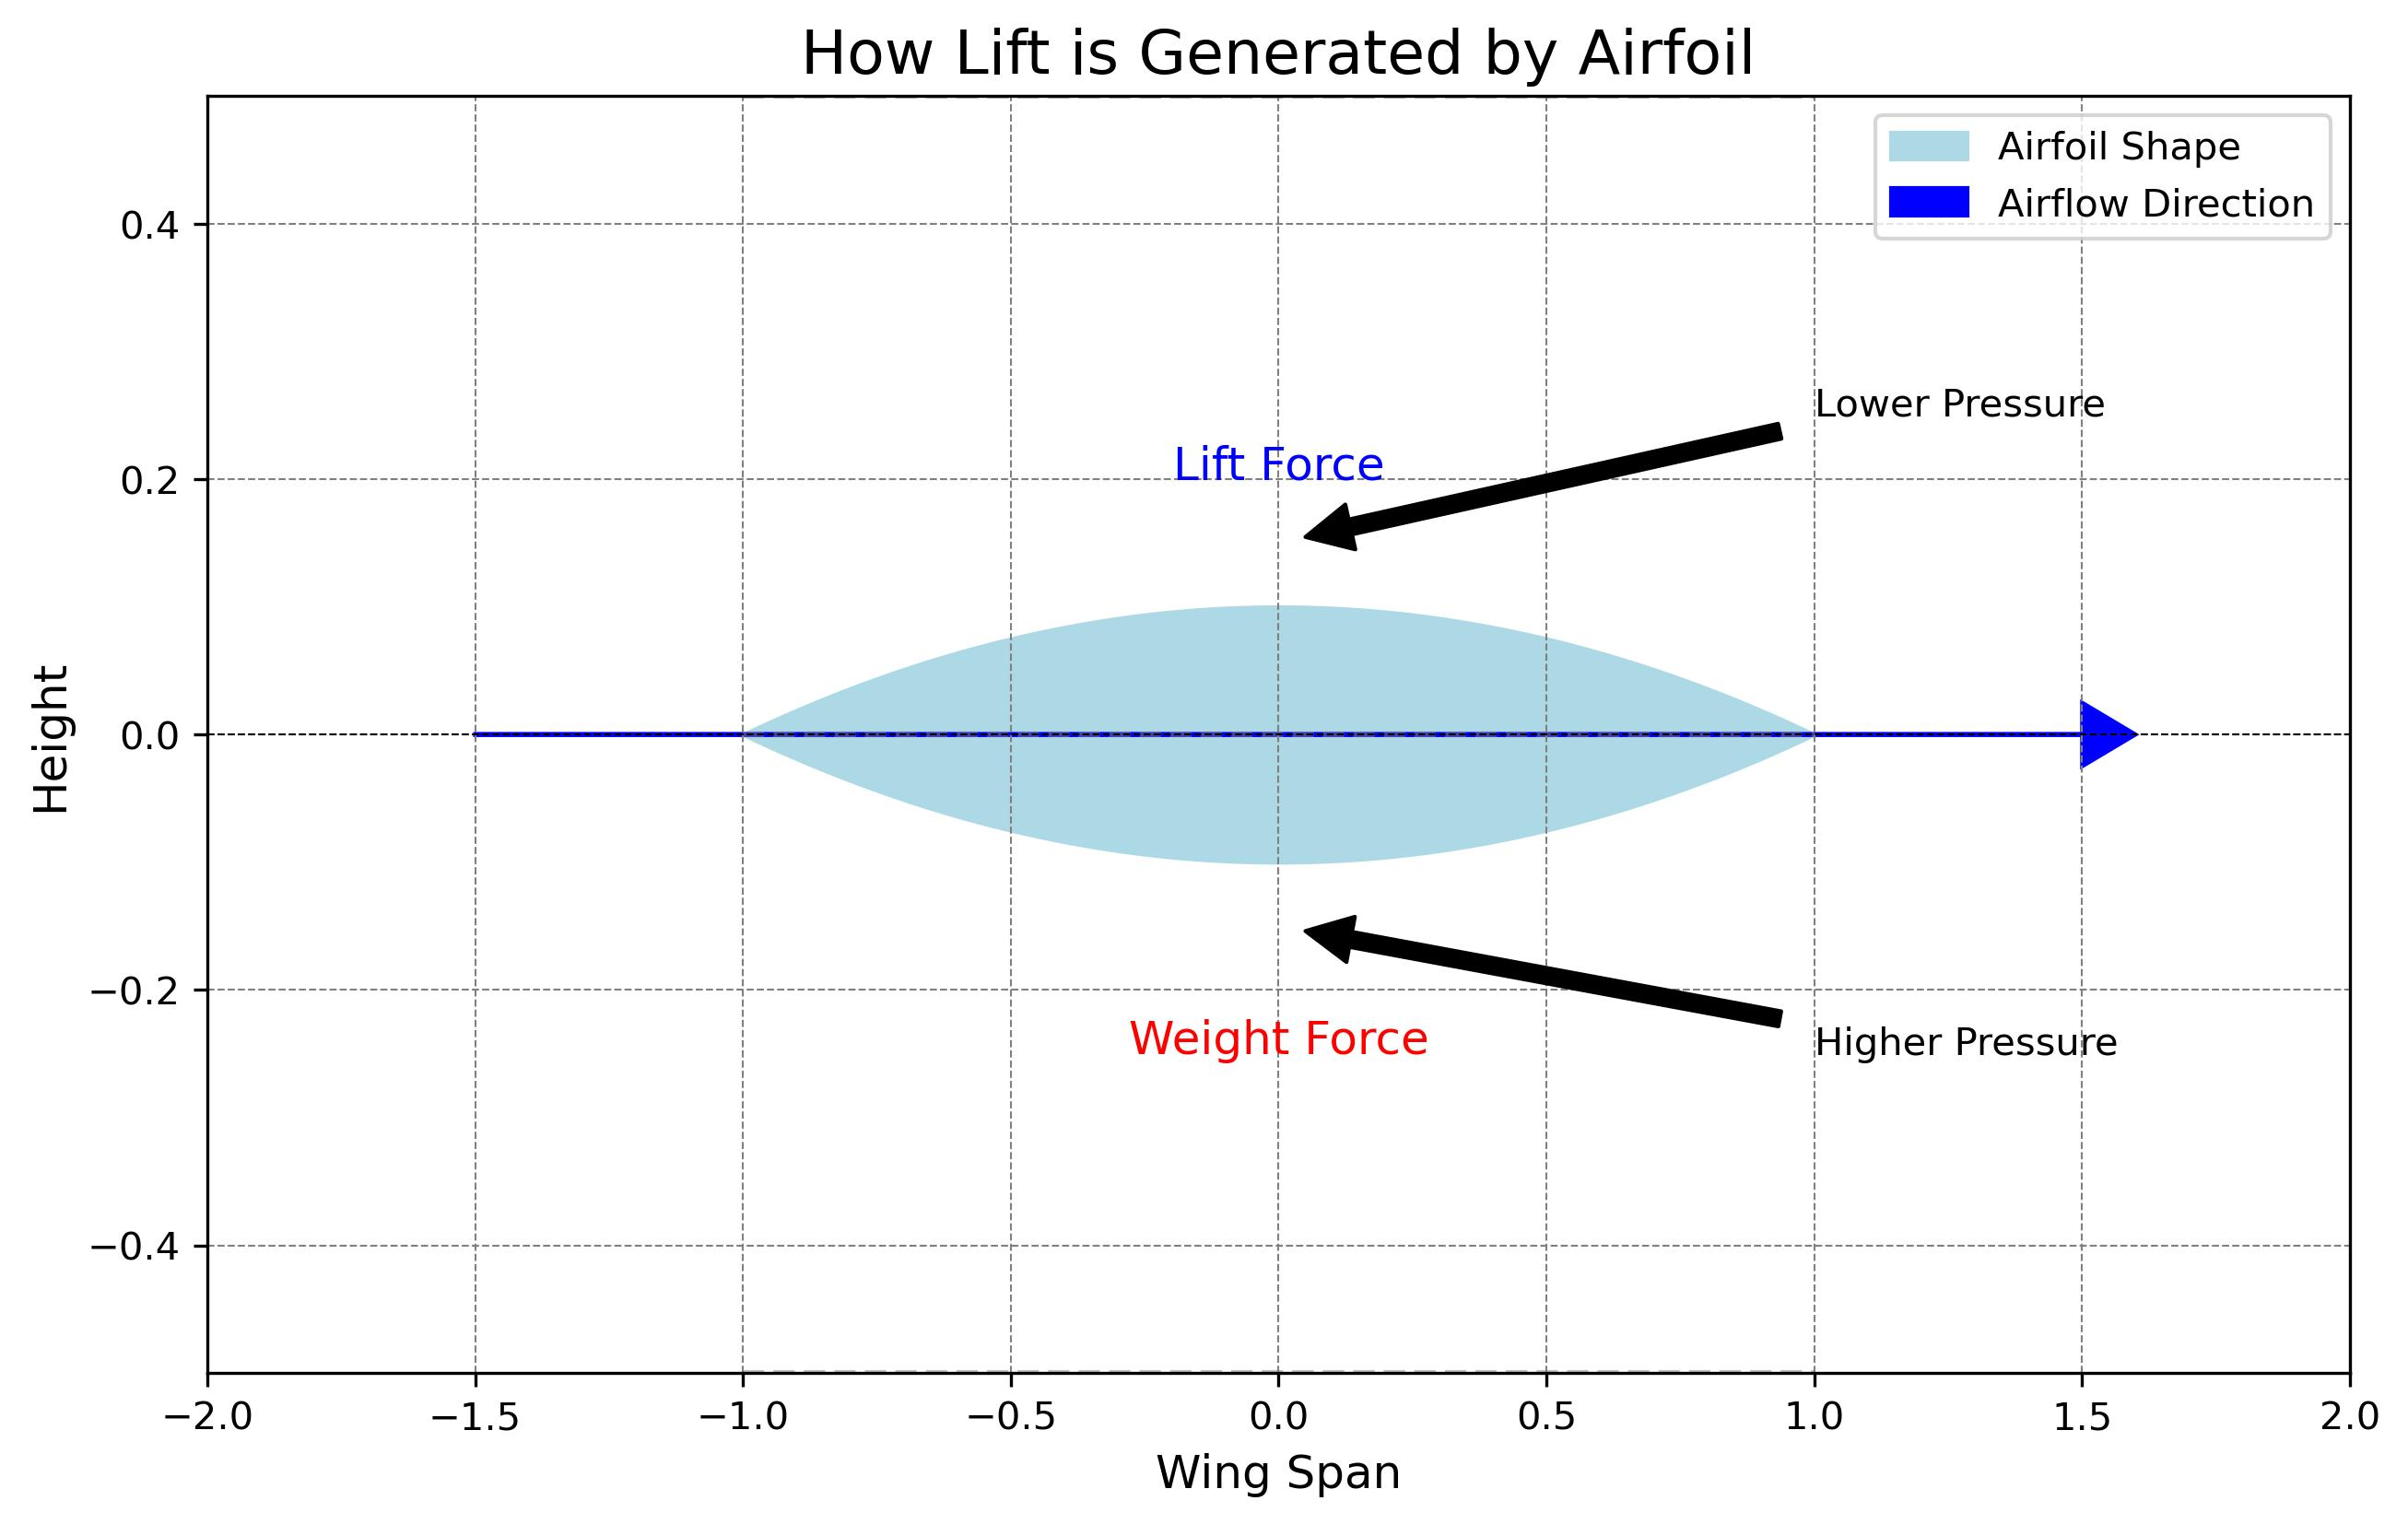

In [64]:
history

[{'role': 'system',
  'content': '\n\nYou are an AI assistant that critiques Matplotlib diagrams.\n\nYour task is as follows:\n\n1. **Analyze** the diagram provided.\n2. **Identify** flaws in the diagram. Flaws can be both:\n    - **Visual**: Issues with clarity, labeling, or aesthetics.\n    - **Conceptual**: Errors in the representation of the underlying concepts.\n3.a. **If the diagram is correct** and has no flaws, state that it is correct.\n3.b. **If the diagram is incorrect** or can be improved, provide clear instructions for improving the diagram. These instructions should be detailed and actionable.: \n\n'},
 {'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing t
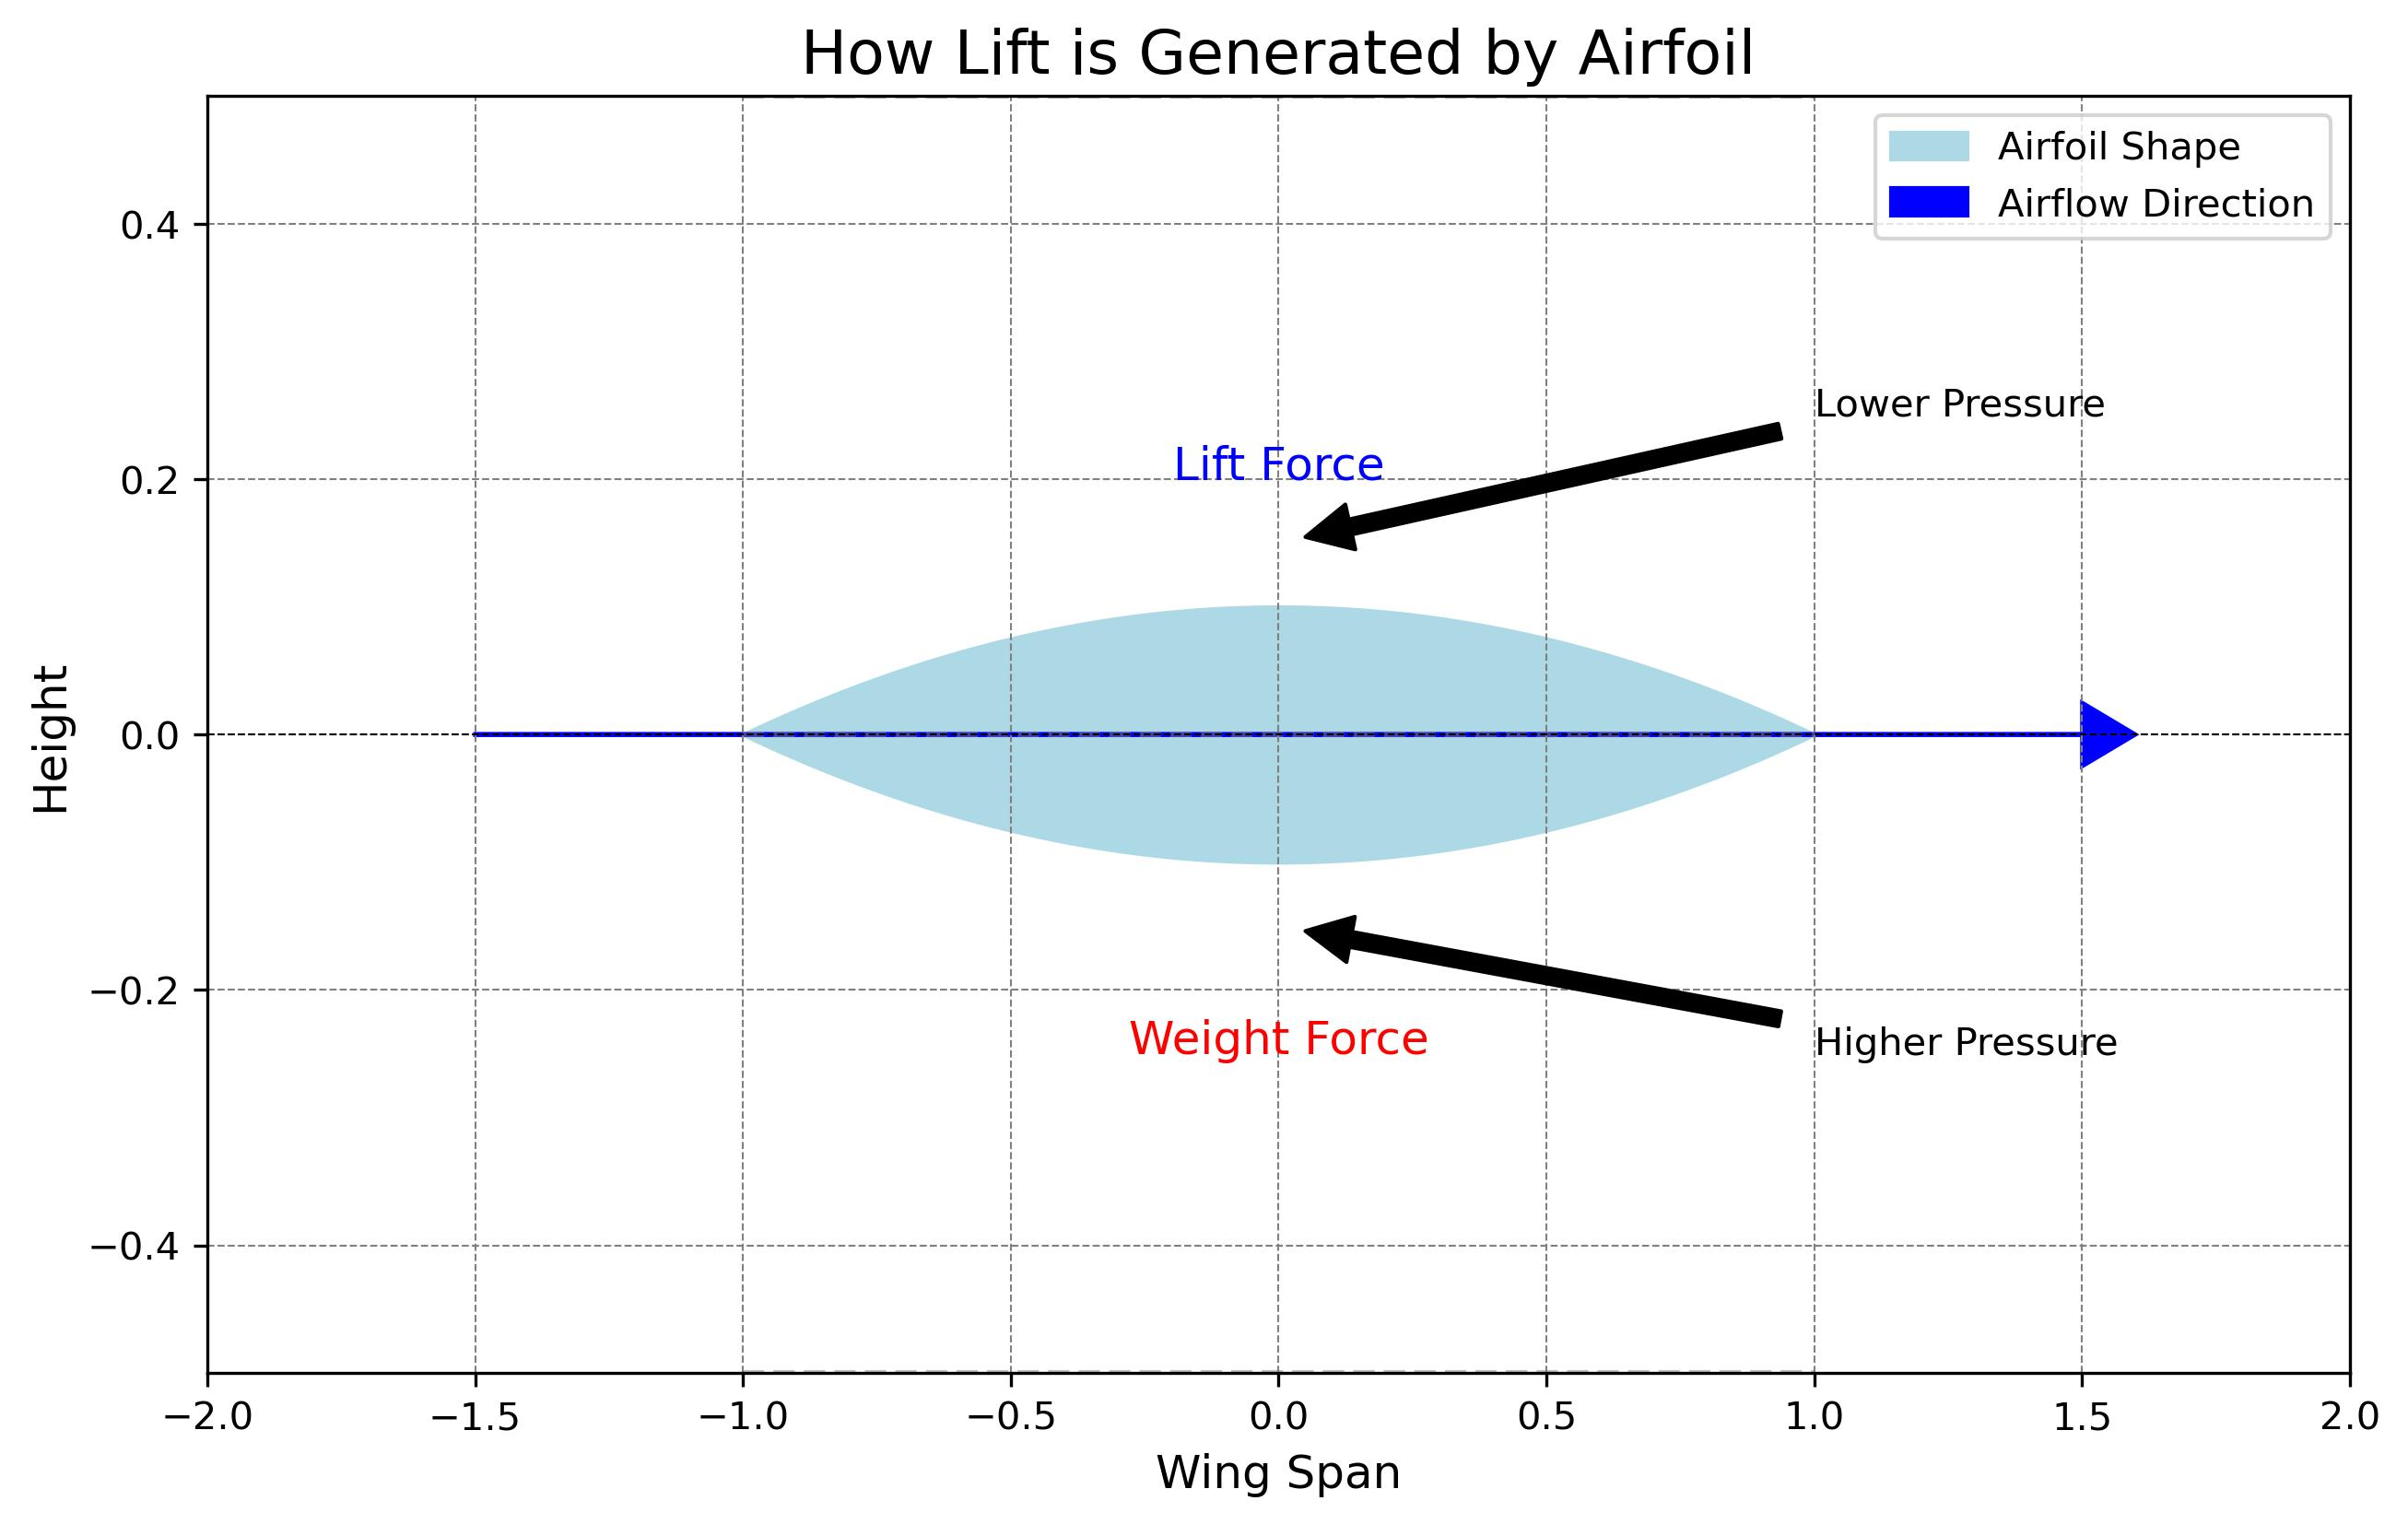

In [65]:
messages = [{"role": "system", "content": prompt_qa}] + history

messages

In [66]:
response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    temperature=0.7,
    messages=messages,
)

print(response.choices[0].message.content)

The diagram provides a visual representation of how lift is generated by an airfoil. Here’s an analysis of the diagram:

### Visual Flaws:
1. **Label Clarity**: The labels for "Lower Pressure" and "Higher Pressure" are somewhat ambiguous, as they do not clearly indicate which side corresponds to which pressure. It may be beneficial to use arrows that point directly to the respective areas of pressure difference.
2. **Arrow Direction**: The arrows for "Lift Force" and "Weight Force" could be more distinct. They currently blend into the diagram and might be confused with the airflow lines. Consider using thicker arrows or different colors for better visibility.
3. **Legend Visibility**: The legend is somewhat small and could be made larger or placed in a more prominent location to ensure it is easily readable.
4. **Grid Lines**: The grid lines might be too pronounced, which can distract from the main content of the diagram. Consider reducing their opacity or thickness.

### Conceptual Fl

[{'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."},
 {'content': "```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Step 1: Create the figure and axes\nfig, ax = plt.subplots(figsize=(10, 6))\n\n# Step 2: Draw the airplane wings (airfoil shape)\nx = np.linspace(-1, 1, 100)\ny_top = 0.1 * (1 - (x**2))  # Top part of the airfoil\ny_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil\n\n# Step 3: Plot the airfoil\nax.fill_betwee
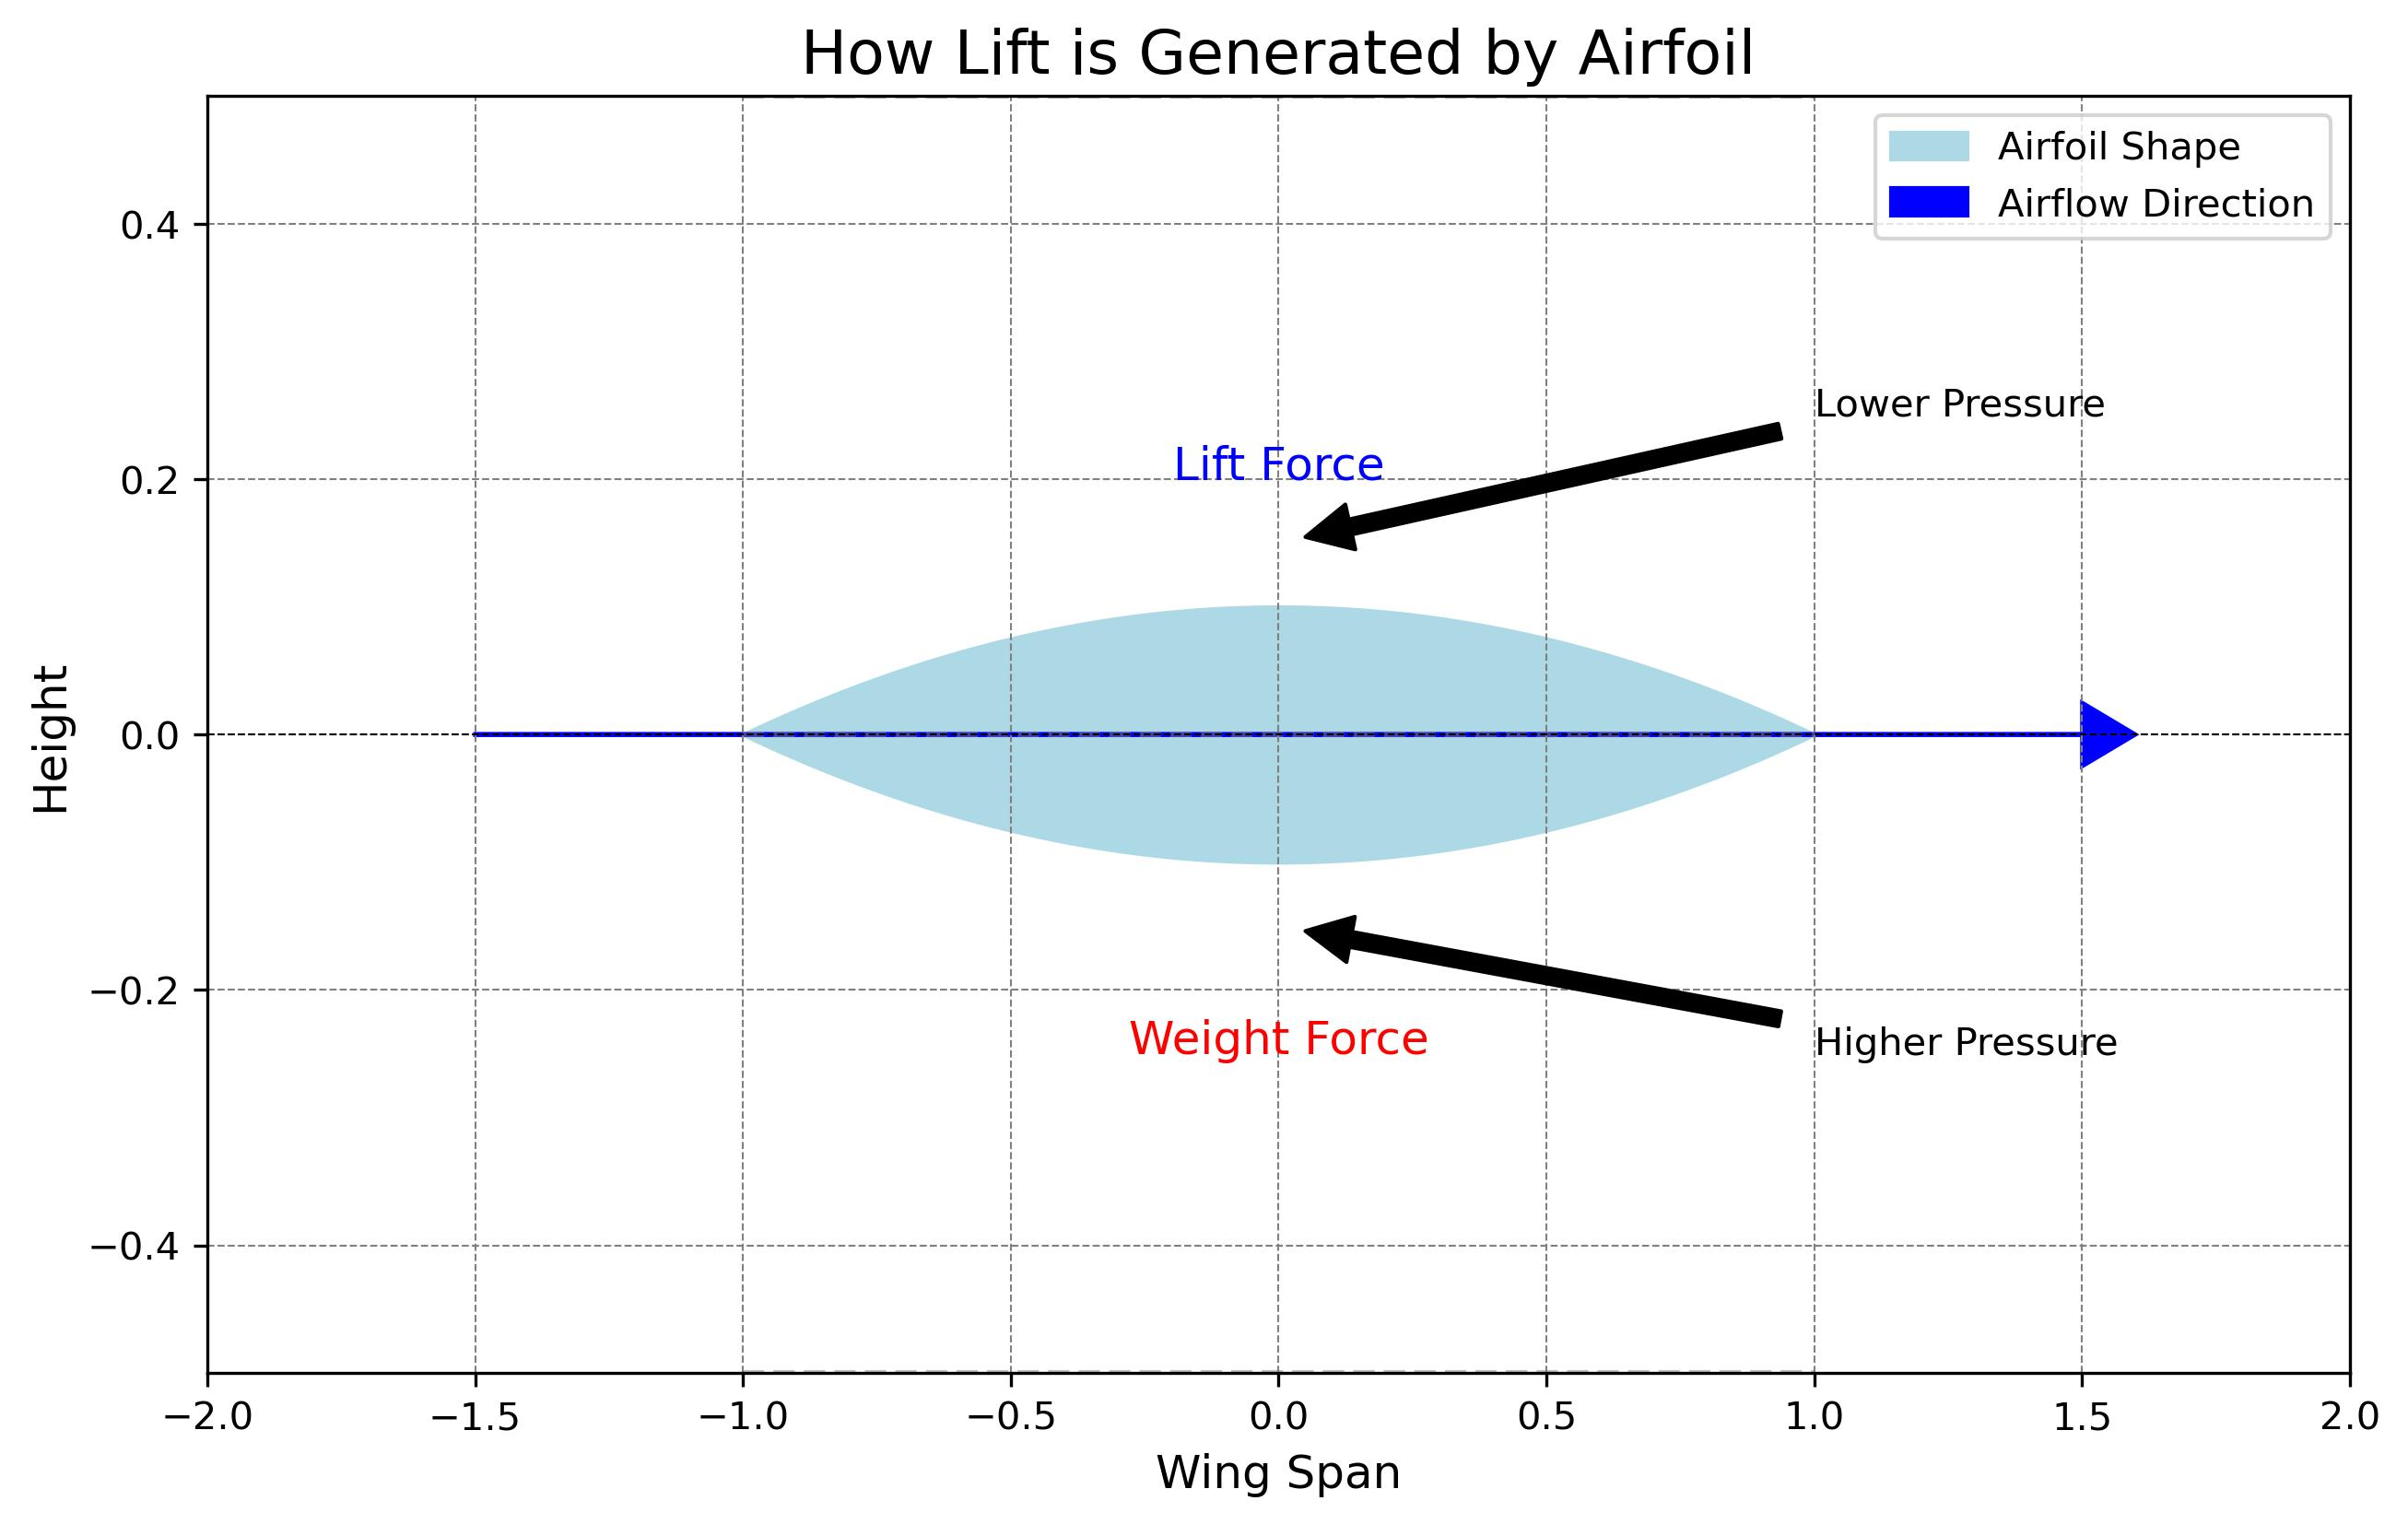

In [67]:
message = response.choices[0].message

history.append(
    json.loads(message.model_dump_json())
)

history

[{'role': 'system',
  'content': '\n\nYou are an AI assistant that generates Python scripts using Matplotlib to create diagrams illustrating science concepts.\n\nYour task is as follows:\n\n- **Analyze** the text and identify key concepts that can be visually represented.\n- **Plan** step-by-step what to include in the diagram, and write this plan in pseudocode with great detail.\n- **Output** the complete Python code in a single code block, including necessary imports.\n- **Minimize** any other prose.\n- **Format** your answer using Markdown, and include the programming language name at the start of the code block (e.g., `python`).\n\nDo not include any additional explanations or text. Your code should be complete and runnable as-is to generate the diagram.\n\n\n**REDO TASK**\nYou may have already performed this task in the previous prompt. If so, thoroughly review your previous work and the subsequent feedback before proceeding.\n\nFor redo tasks, you should aim to improve your perfo
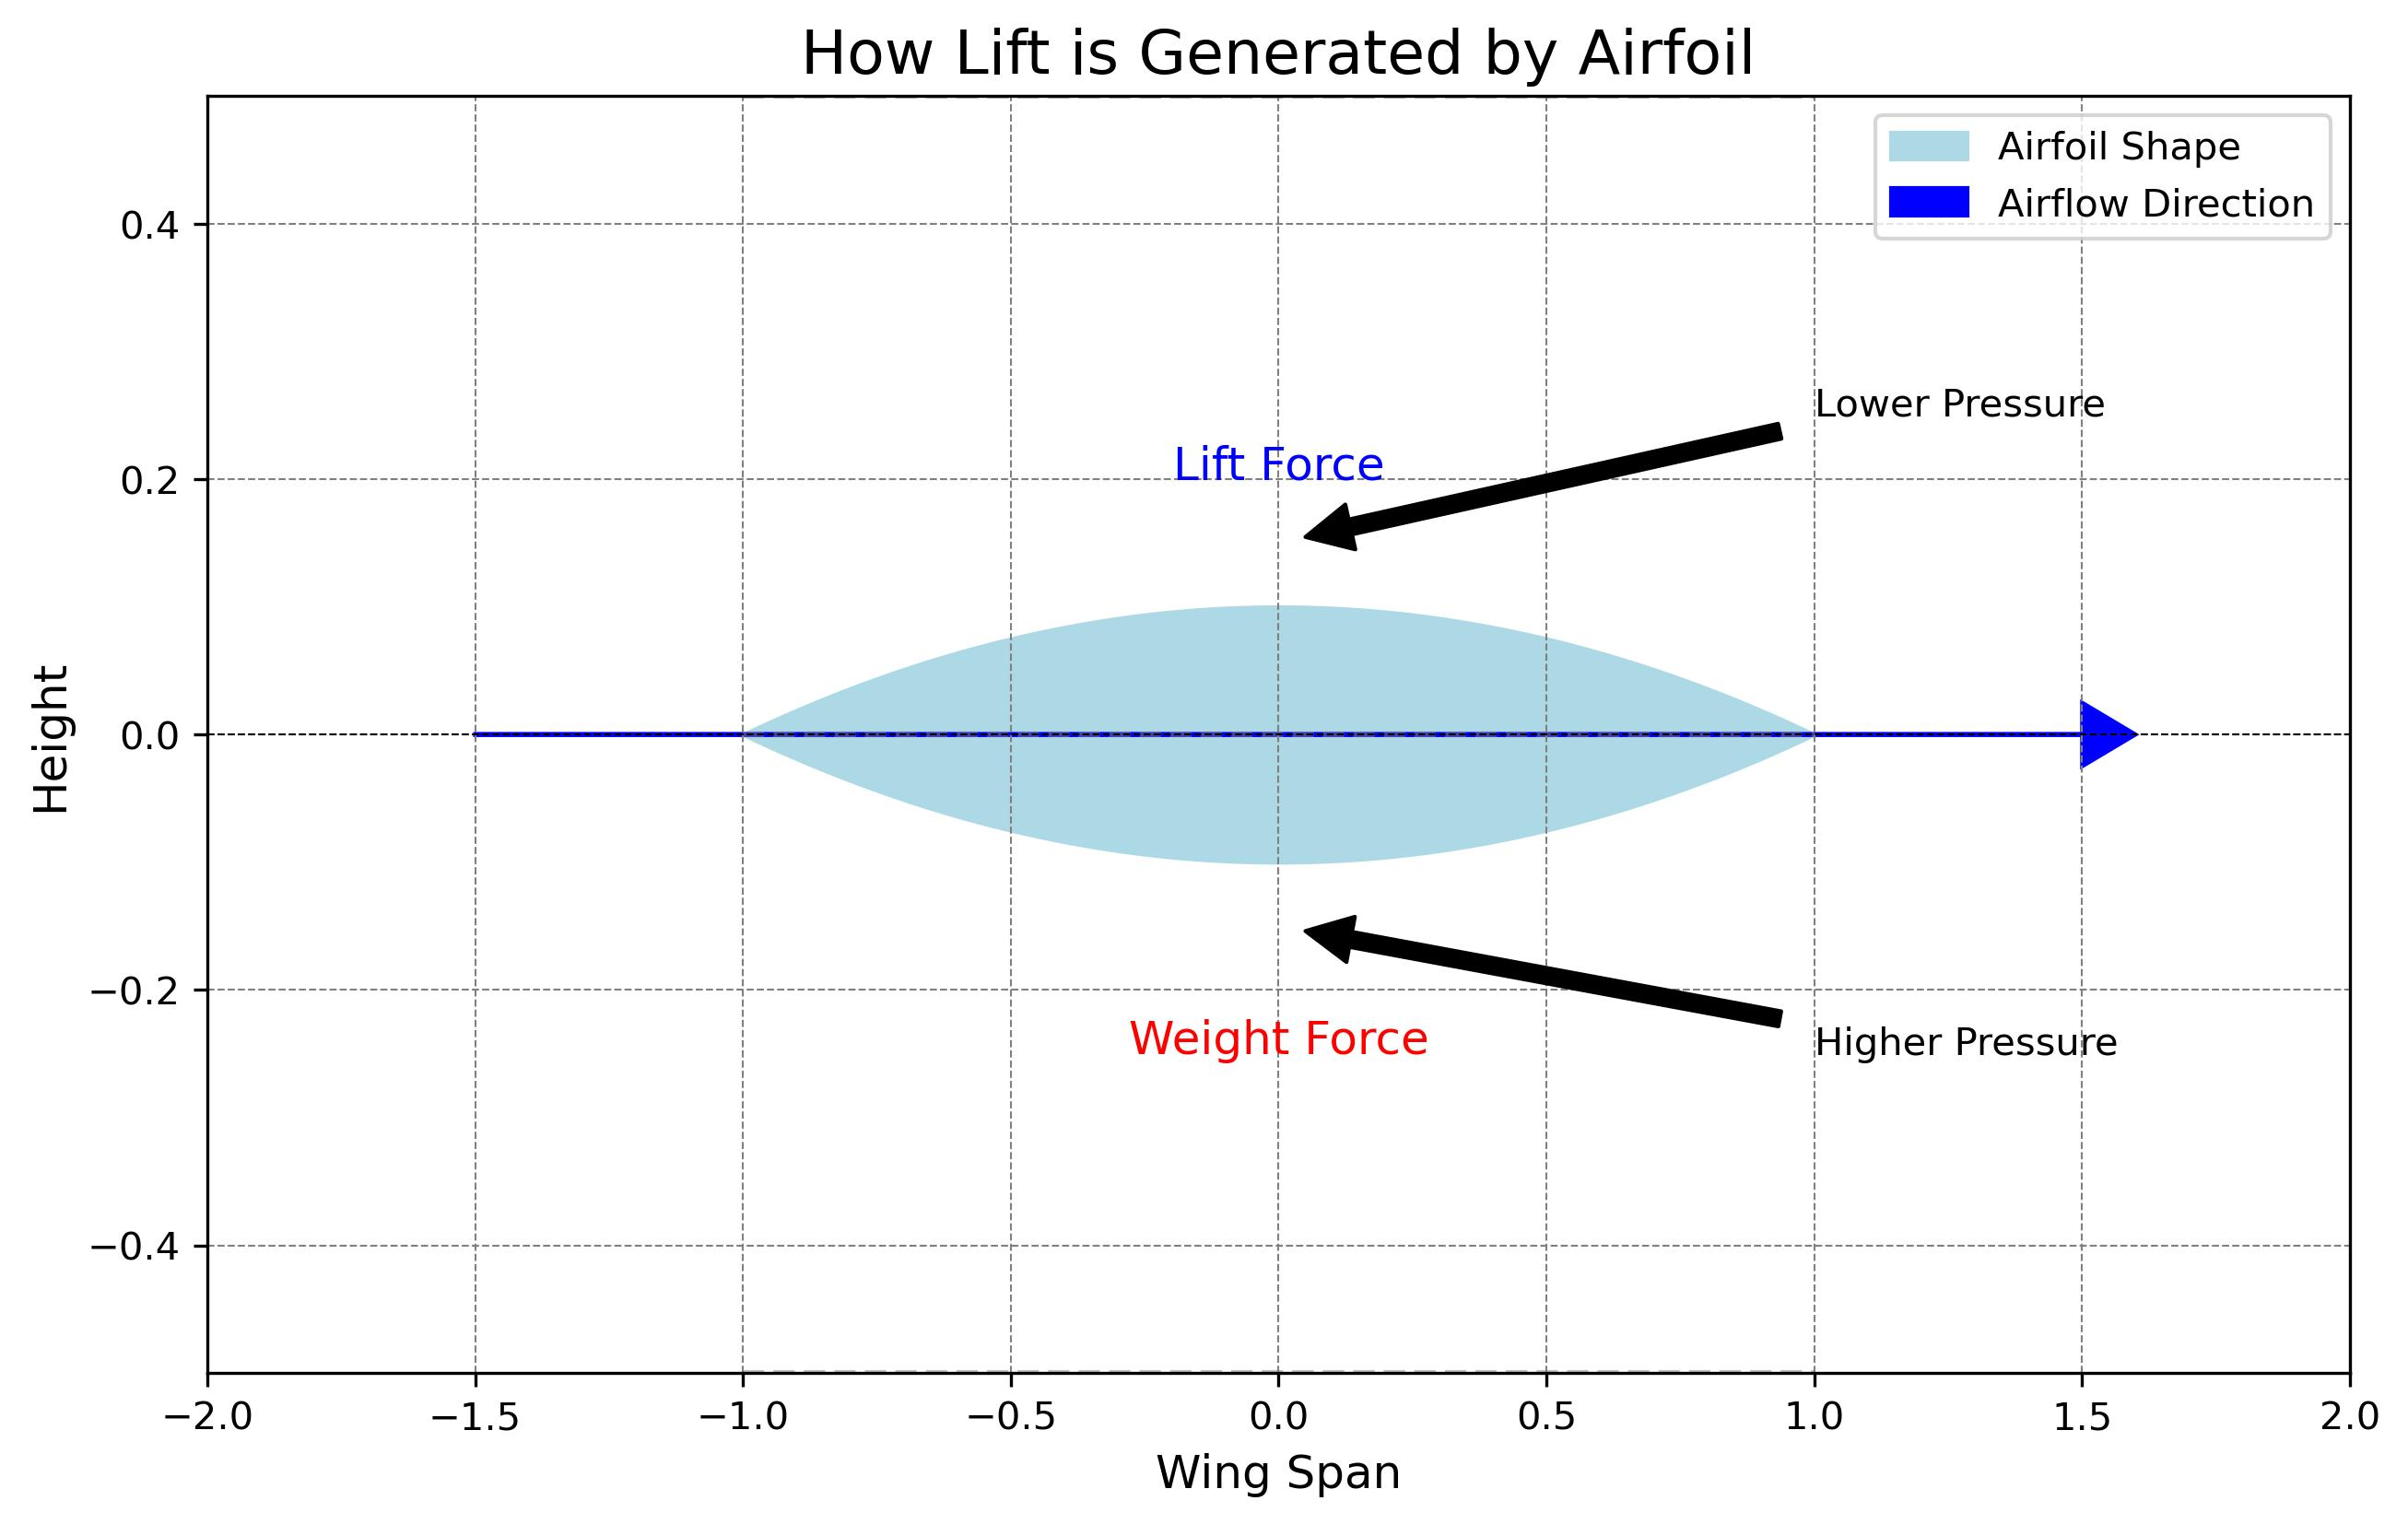

In [68]:
messages = [{"role": "system", "content": prompt_dev}] + history

messages

In [69]:
response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    temperature=0.7,
    messages=messages,
)

print(response.choices[0].message.content)

```python
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Draw the airplane wings (airfoil shape)
x = np.linspace(-1, 1, 100)
y_top = 0.1 * (1 - (x**2))  # Top part of the airfoil
y_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil

# Step 3: Plot the airfoil
ax.fill_between(x, y_top, y_bottom, color='deepskyblue', label='Airfoil Shape')

# Step 4: Add airflow lines
for i in np.linspace(-0.4, 0.4, 5):
    ax.plot([-1, 1], [i, i], color='gray', linestyle='--', alpha=0.5)

# Step 5: Add arrows to indicate airflow direction
ax.arrow(-1.5, 0, 3, 0, head_width=0.05, head_length=0.1, fc='blue', ec='blue', label='Airflow Direction')

# Step 6: Annotate pressure difference
ax.annotate('Lower Pressure', xy=(0, 0.15), xytext=(1, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.annotate('Higher Pressure', xy=(0, -0.15), xytext=(1, -0.25),
             arrowprops

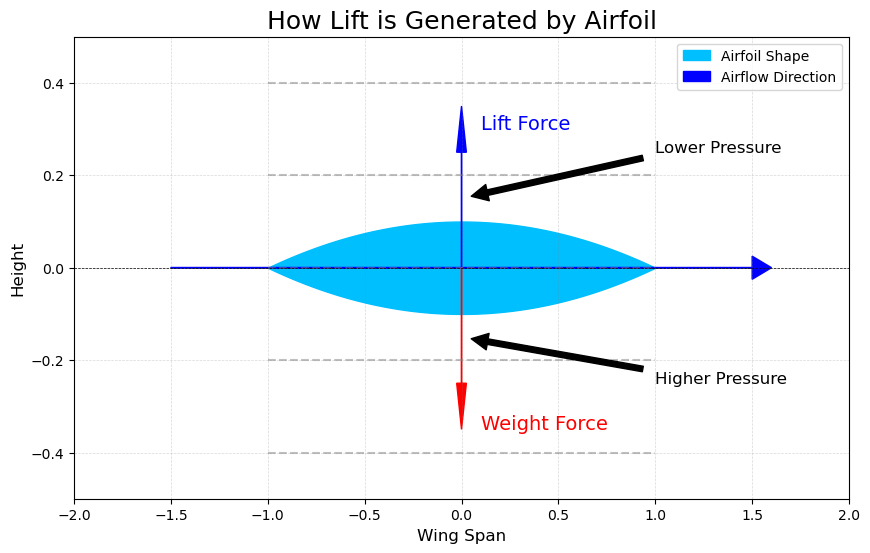

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Step 2: Draw the airplane wings (airfoil shape)
x = np.linspace(-1, 1, 100)
y_top = 0.1 * (1 - (x**2))  # Top part of the airfoil
y_bottom = -0.1 * (1 - (x**2))  # Bottom part of the airfoil

# Step 3: Plot the airfoil
ax.fill_between(x, y_top, y_bottom, color='deepskyblue', label='Airfoil Shape')

# Step 4: Add airflow lines
for i in np.linspace(-0.4, 0.4, 5):
    ax.plot([-1, 1], [i, i], color='gray', linestyle='--', alpha=0.5)

# Step 5: Add arrows to indicate airflow direction
ax.arrow(-1.5, 0, 3, 0, head_width=0.05, head_length=0.1, fc='blue', ec='blue', label='Airflow Direction')

# Step 6: Annotate pressure difference
ax.annotate('Lower Pressure', xy=(0, 0.15), xytext=(1, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.annotate('Higher Pressure', xy=(0, -0.15), xytext=(1, -0.25),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# Step 7: Add Lift and Weight Force arrows
ax.arrow(0, 0, 0, 0.25, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
ax.arrow(0, 0, 0, -0.25, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Step 8: Annotate Lift and Weight Forces
ax.text(0.1, 0.3, 'Lift Force', fontsize=14, color='blue')
ax.text(0.1, -0.35, 'Weight Force', fontsize=14, color='red')

# Step 9: Add labels and title with increased font size
ax.set_title('How Lift is Generated by Airfoil', fontsize=18)
ax.set_xlabel('Wing Span', fontsize=12)
ax.set_ylabel('Height', fontsize=12)

# Step 10: Set limits and grid
ax.set_xlim(-2, 2)
ax.set_ylim(-0.5, 0.5)
ax.axhline(0, color='black', linewidth=0.5, ls='--')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

# Step 11: Show legend
ax.legend()

plt.savefig('diagrams_v3/how_lift_is_generated_by_airfoil_v3.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Step 12: Display the plot
plt.show()

### Feedback

In [73]:
history = [history]

message = response.choices[0].message

history.append(
    json.loads(message.model_dump_json())
)

# Path to your image
image_path = 'diagrams_v3/how_lift_is_generated_by_airfoil_v3.jpg'

# Getting the base64 string
base64_image = encode_image(image_path)

message = {
    "role": "user",
    "content": [
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        }
    ],
}

history.append(message)

messages = [{"role": "system", "content": prompt_qa}] + history

response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    temperature=0.7,
    messages=messages,
)

print(response.choices[0].message.content)

BadRequestError: Error code: 400 - {'error': {'message': "Invalid type for 'messages[1]': expected an object, but got an array instead.", 'type': 'invalid_request_error', 'param': 'messages[1]', 'code': 'invalid_type'}}

[{'role': 'system',
  'content': '\n\nYou are an AI assistant that critiques Matplotlib diagrams.\n\nYour task is as follows:\n\n1. **Analyze** the diagram provided.\n2. **Identify** flaws in the diagram. Flaws can be both:\n    - **Visual**: Issues with clarity, labeling, or aesthetics.\n    - **Conceptual**: Errors in the representation of the underlying concepts.\n3.a. **If the diagram is correct** and has no flaws, state that it is correct.\n3.b. **If the diagram is incorrect** or can be improved, provide clear instructions for improving the diagram. These instructions should be detailed and actionable.: \n\n'},
 [[{'role': 'assistant',
    'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wi
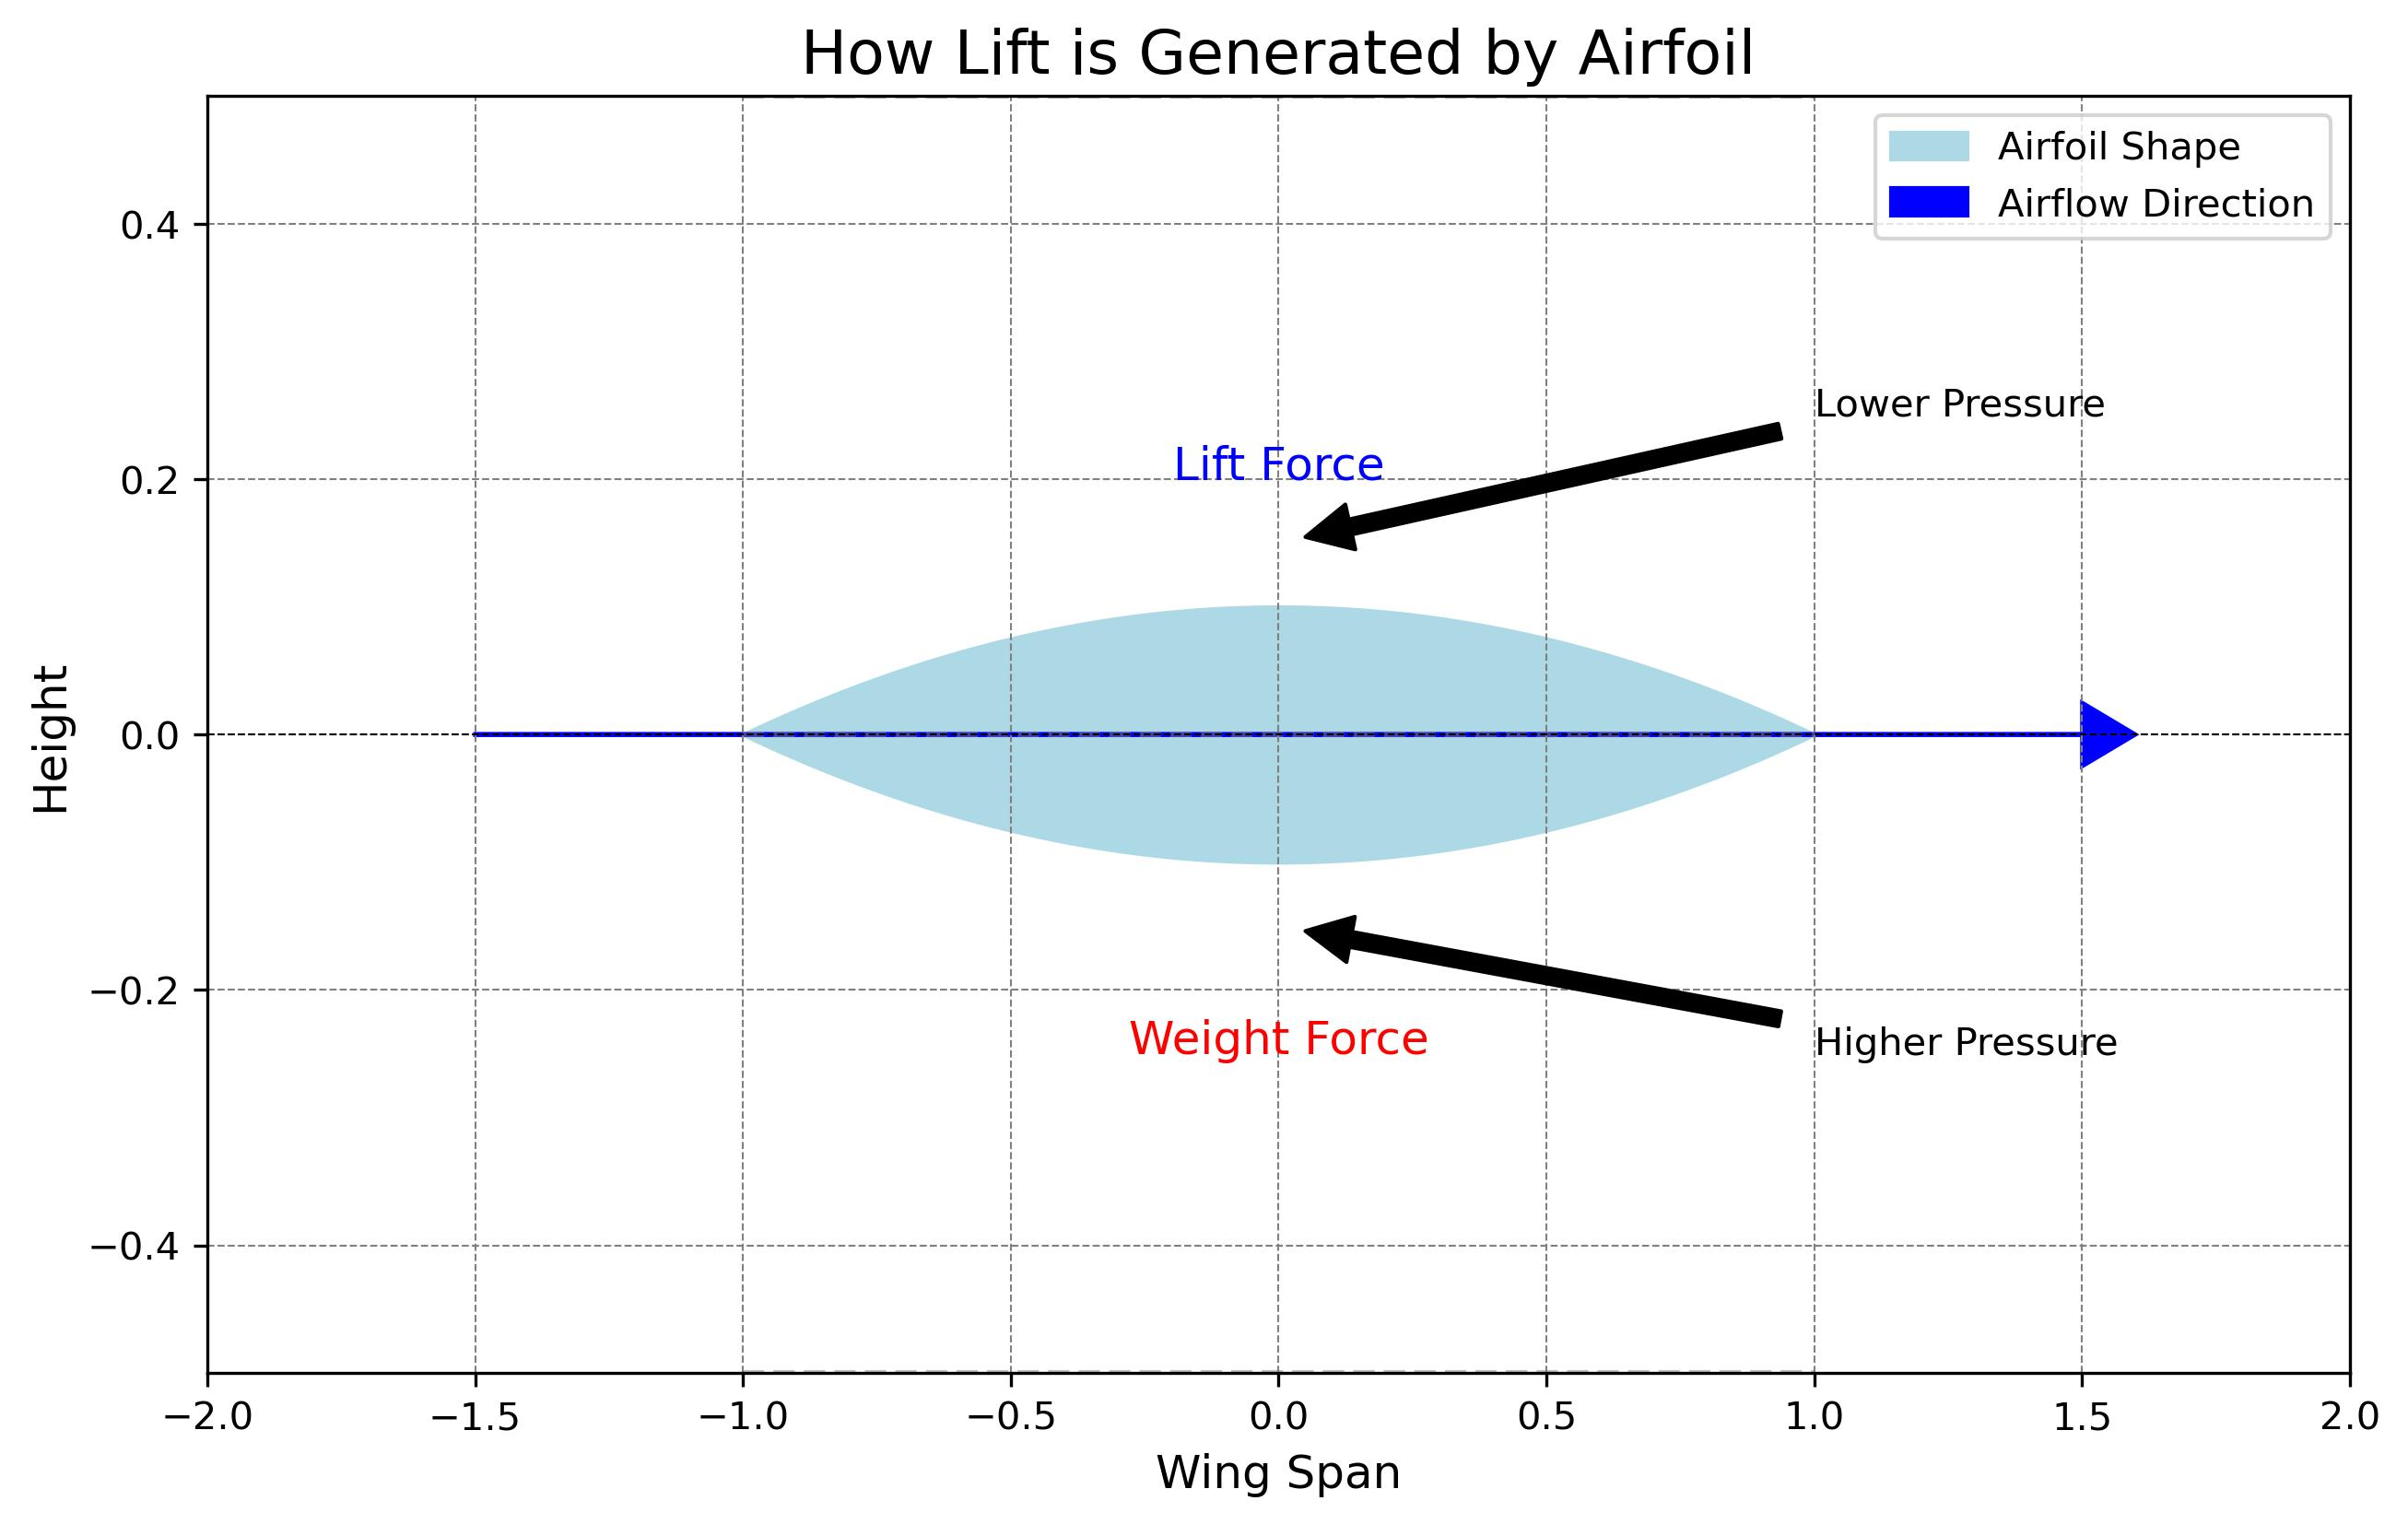
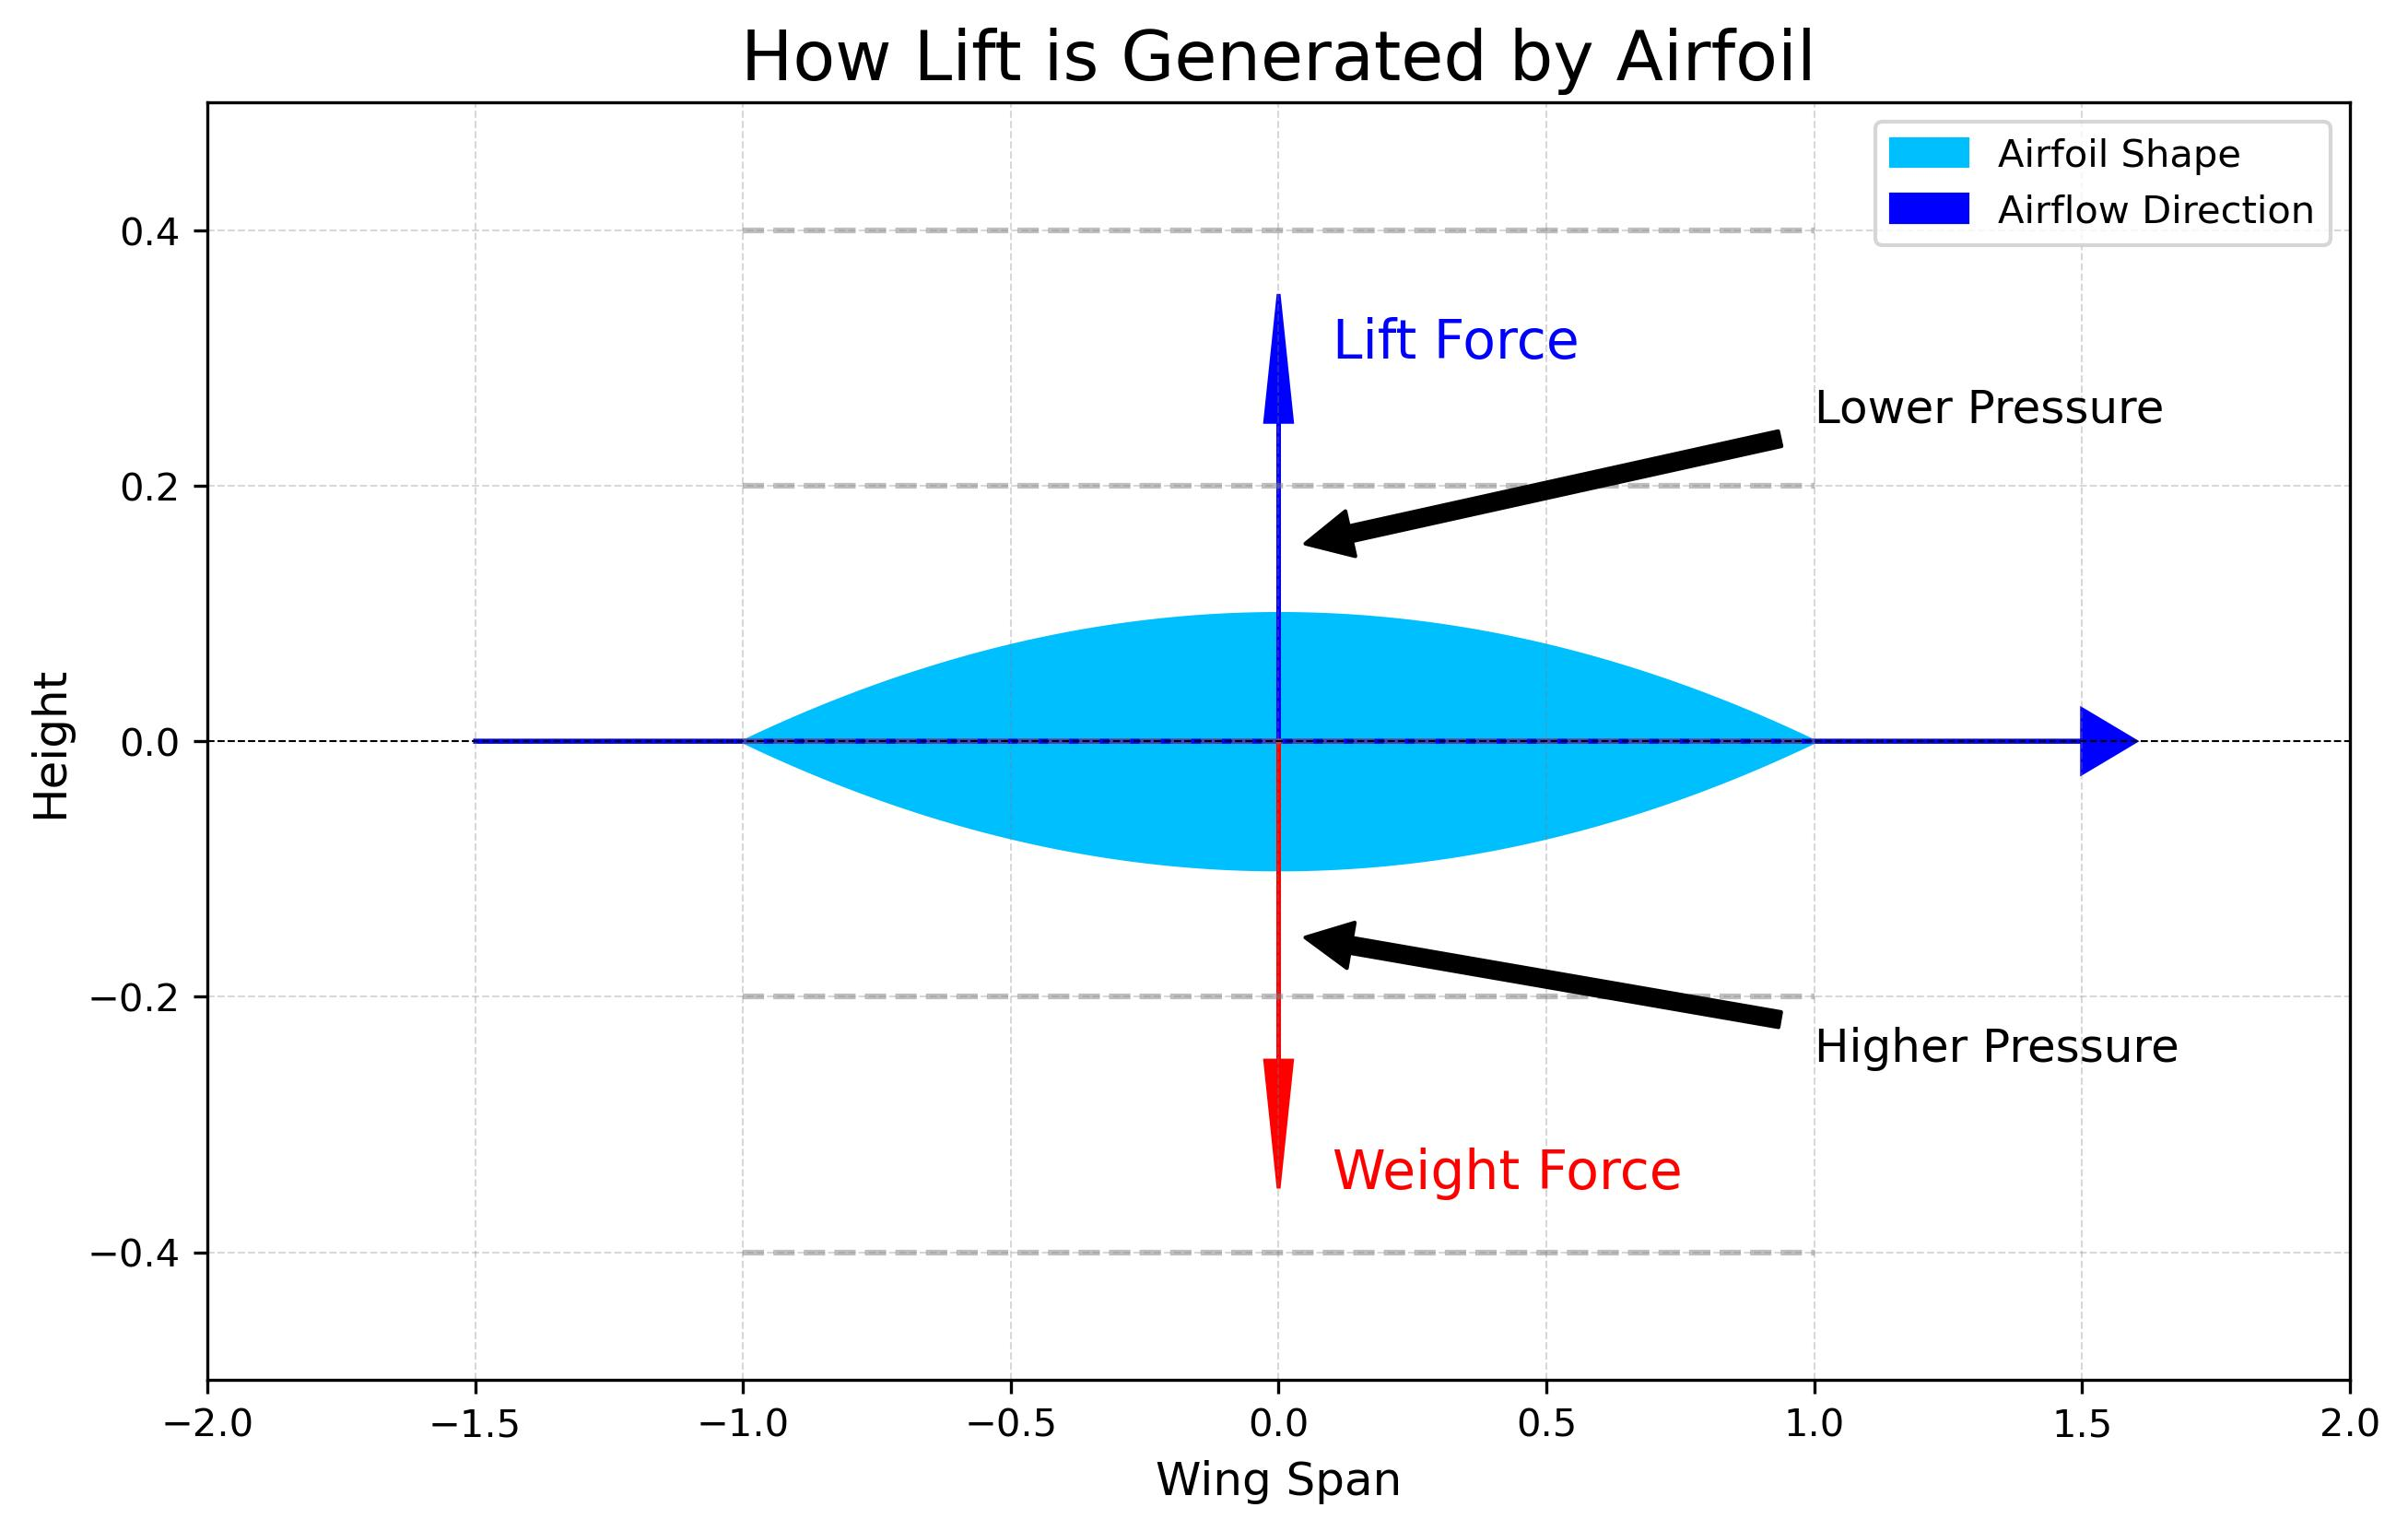

In [74]:
messages

In [77]:
context = messages[1][0][0]

context

{'role': 'assistant',
 'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing than underneath it. According to Bernoulli's principle, \nthe faster air on top creates a lower pressure compared to the higher pressure underneath. This \npressure difference creates lift, allowing the plane to ascend."}

In [78]:
messages[1] = context

[{'role': 'system',
  'content': '\n\nYou are an AI assistant that critiques Matplotlib diagrams.\n\nYour task is as follows:\n\n1. **Analyze** the diagram provided.\n2. **Identify** flaws in the diagram. Flaws can be both:\n    - **Visual**: Issues with clarity, labeling, or aesthetics.\n    - **Conceptual**: Errors in the representation of the underlying concepts.\n3.a. **If the diagram is correct** and has no flaws, state that it is correct.\n3.b. **If the diagram is incorrect** or can be improved, provide clear instructions for improving the diagram. These instructions should be detailed and actionable.: \n\n'},
 {'role': 'assistant',
  'content': "**Lift**: This is the force that allows planes to rise off the ground. It's generated \nby the wings of the plane. Imagine a bird flapping its wings. As air flows over and under the wings, \nit creates a difference in air pressure. The shape of the wing (called an airfoil) is designed so \nthat air moves faster over the top of the wing t
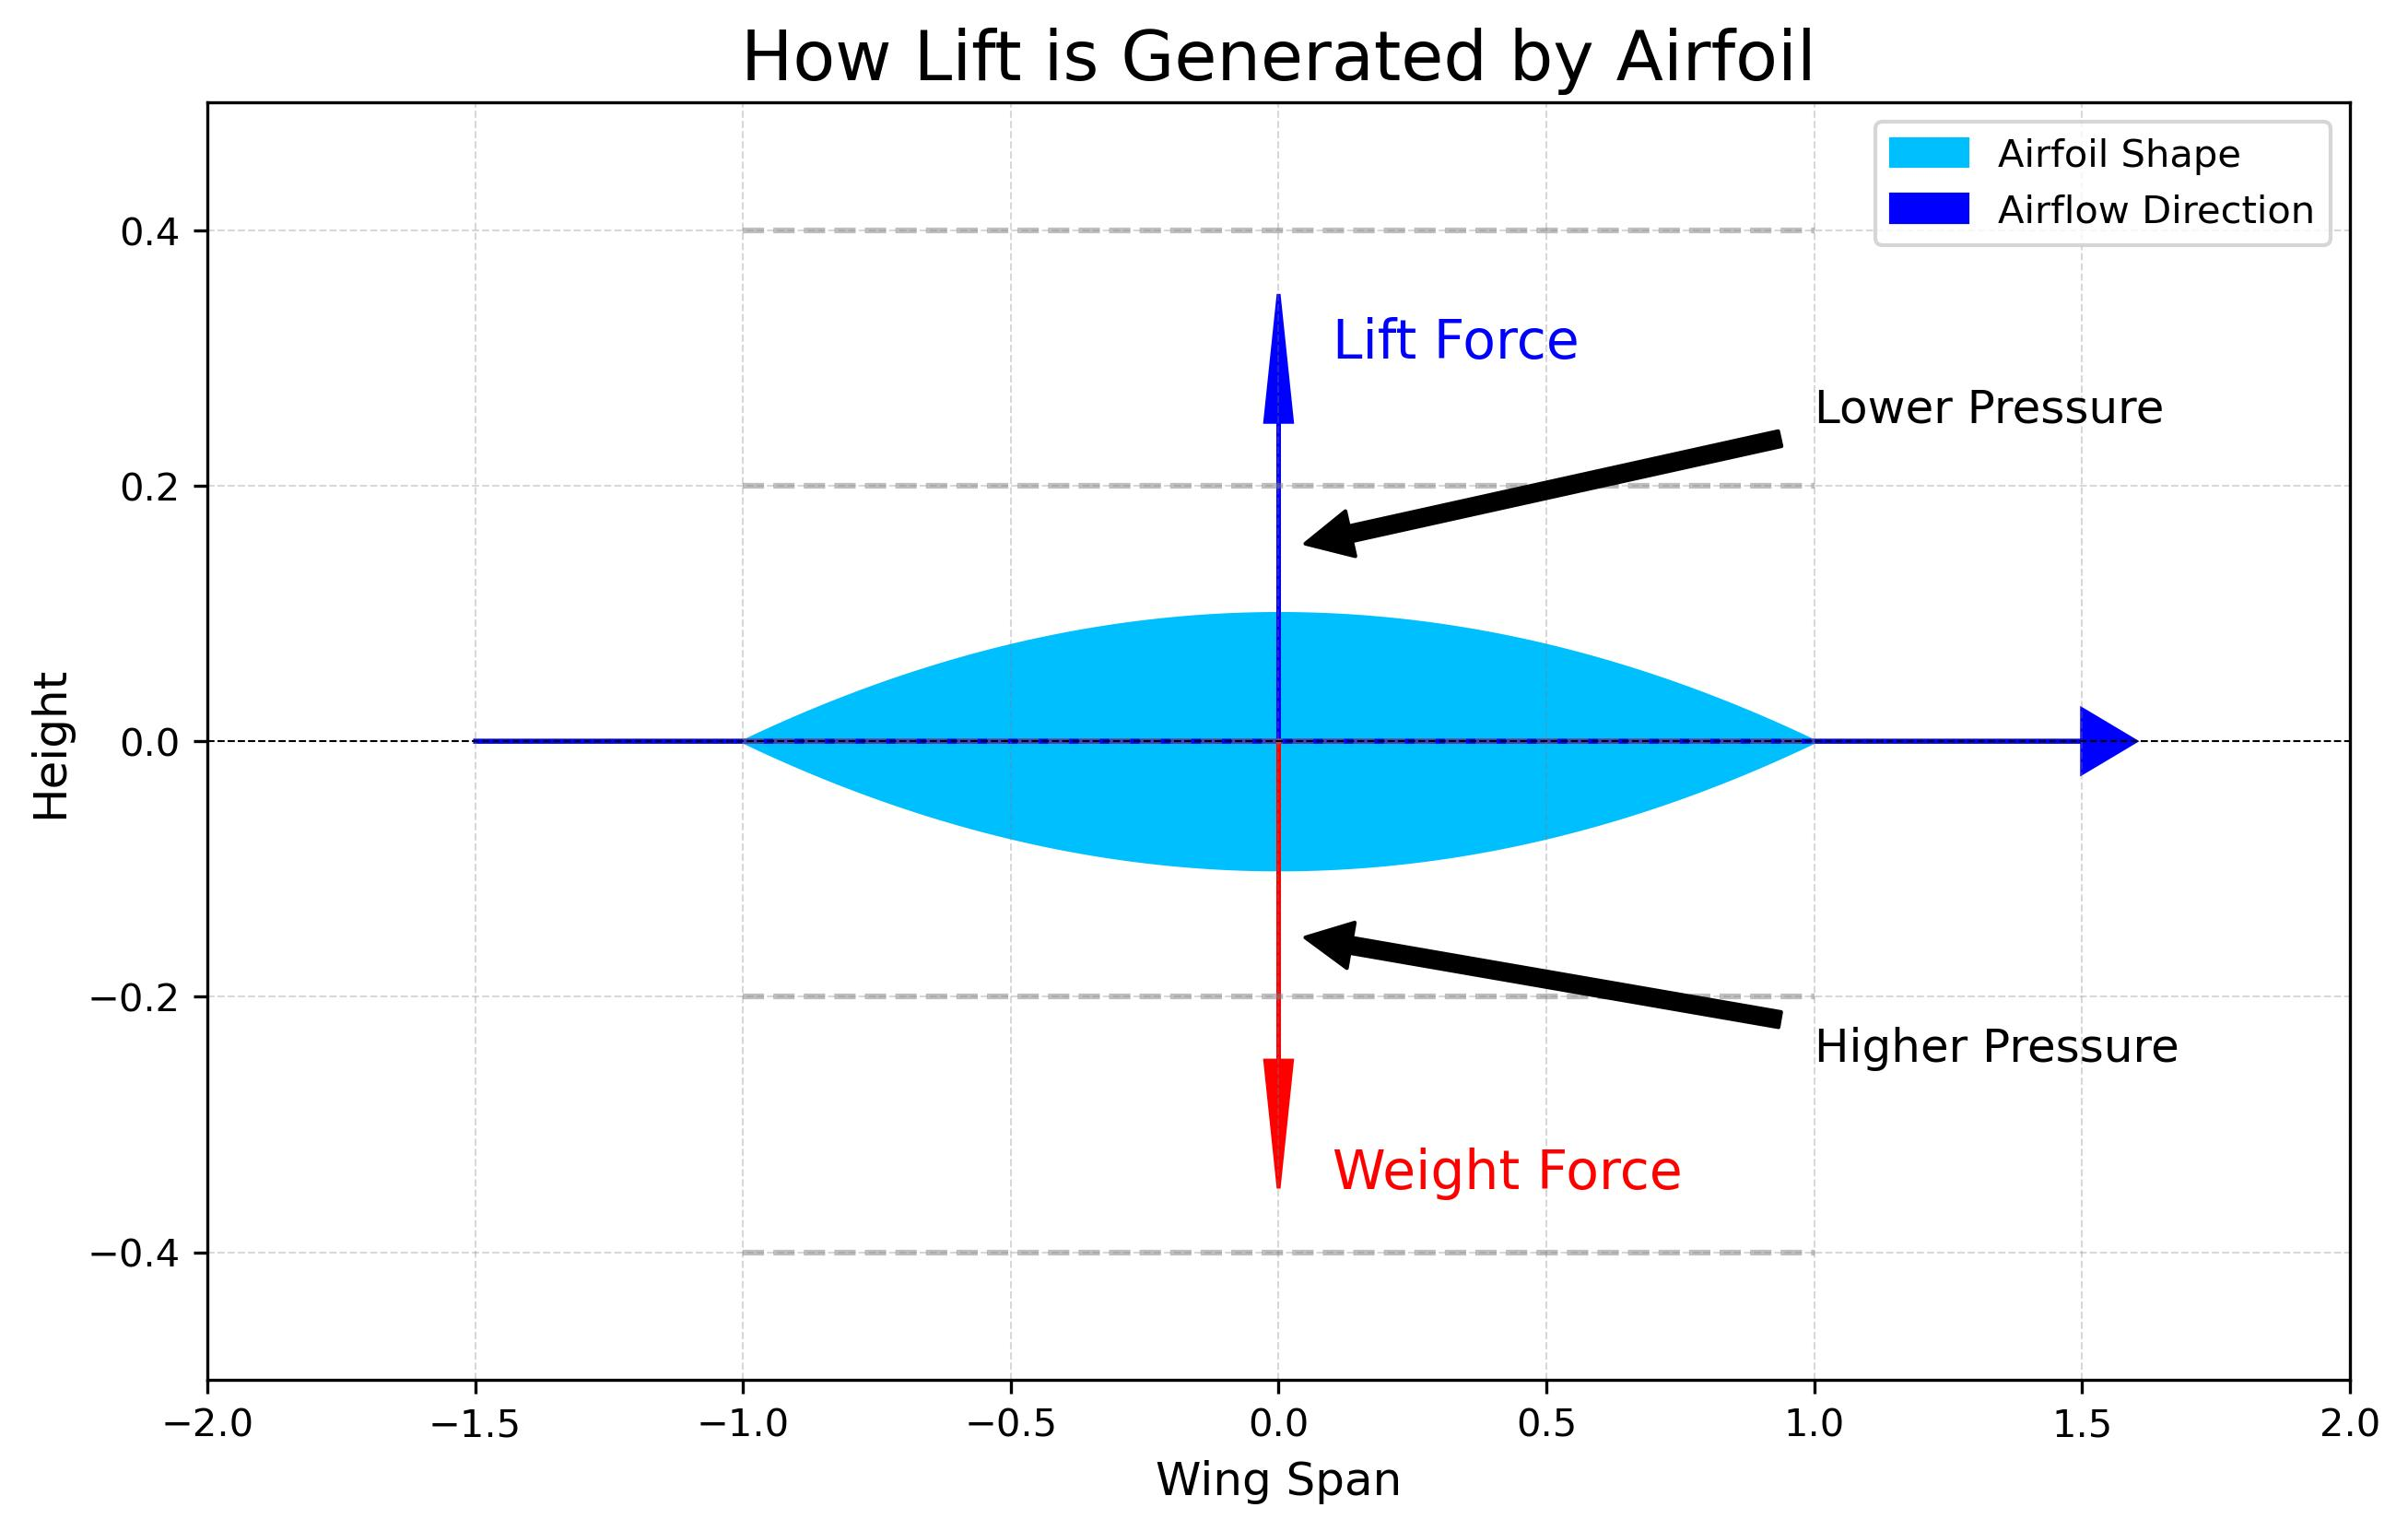

In [79]:
messages

In [80]:
response = client.chat.completions.create(
    model="gpt-4o-mini",  # Replace with the correct engine name
    n=1,
    temperature=0.7,
    messages=messages,
)

print(response.choices[0].message.content)

KeyboardInterrupt: 